# Introduction

---

# Multi-Layer Perceptron (MLP) Implementation

Based on Andrej Karpathy's "Building makemore Part 2: MLP" from the Neural Networks: Hero to Zero series ([Video Link](https://www.youtube.com/watch?v=TCH_1BHY58I)), this colab focuses on constructing an MLP as described in Bengio's paper.

---

## Summary of Transcript

The lecturer is discussing the implementation of a multi-layer perceptron (MLP) for predicting the next character in a sequence. Here's a breakdown of the content:

1. **Introduction**:
    - The lecturer introduced the problem of predicting the next character in a sequence using only the previous character as context. They highlighted the limitations of this simple bigram model.
    - The exponential increase in possibilities as the context length increases was emphasized.

2. **Reference to Bengio et al. 2003 Paper**:
    - The discussion shifted to a paper by Bengio et al. from 2003, which proposed using multi-layer perceptrons for predicting the next token in a sequence.
    - The paper's model was discussed, which embeds words into a 30-dimensional space. This space would then be fine-tuned during training.
    - The lecturer differentiated between the paper's word-level model and the character-level model they are working on.

3. **Embedding Concept**:
    - The idea of embeddings was elaborated upon. Words or characters are transformed into vectors in a high-dimensional space. Similar words or characters might end up close to each other in this space.

4. **Model Architecture**:
    - The neural network architecture proposed in the paper was examined:
        - Input Layer: Takes the index of incoming words and retrieves embeddings from a lookup table.
        - Hidden Layer: Fully connected layer.
        - Output Layer: Predicts the next word out of 17,000 possibilities.
        - Softmax Layer: Converts logits to probabilities.

5. **Implementation using PyTorch**:
    - The lecturer started a new Jupyter notebook and began implementing the model using PyTorch.
    - The dataset was loaded, and the vocabulary was constructed.
    - The lecturer discussed the concept of "block size" which represents the context length.
    - The dataset was prepared using this block size. The lecturer demonstrated how to reshape the data for different block sizes using examples.
    - The embedding lookup table was implemented. The lecturer emphasized the efficiency and flexibility of PyTorch indexing.
    - The hidden layer of the network was then implemented. The lecturer explained the concept of tensor views and storage in PyTorch, emphasizing the efficiency of reshaping operations using views.
    - The addition of biases was also discussed, with a focus on broadcasting in PyTorch to ensure that the bias addition works correctly across batches of data.

The lecture seems to be a mix of theoretical understanding and practical implementation, giving students a comprehensive understanding of the multi-layer perceptron model for language prediction. The lecturer's approach of explaining PyTorch operations in detail is helpful for students to understand the nuances of tensor operations and the efficiency considerations involved.

---

The lecturer discusses the following topics:

1. **Using PyTorch's Functional Cross-Entropy**:
   - Instead of manually calculating the cross-entropy loss using softmax and negative log likelihood, one can use PyTorch's built-in function `F.cross_entropy` which is optimized for performance.
   - The benefits of using `F.cross_entropy`:
     - Avoids creating intermediate tensors, thereby saving memory.
     - Provides an efficient backward pass.
     - Handles numerical instabilities, especially when dealing with extremely large or small logits.

2. **Training on the Full Dataset with Mini-Batches**:
   - Instead of training on the entire dataset, which can be computationally expensive, mini-batches are used.
   - Training on mini-batches provides an approximate gradient, which is often sufficient for training purposes and is much faster than using the full dataset.

3. **Finding a Good Initial Learning Rate**:
   - The learning rate plays a crucial role in the optimization process.
   - A method to find a reasonable learning rate:
     - Start with a very low learning rate and gradually increase it.
     - Plot the loss against the learning rate.
     - Choose a learning rate from the plot where the loss is still decreasing but before it starts to increase or become unstable.

4. **Training Neural Network**:
   - The training loop consists of the forward pass, backward pass, and parameter update.
   - Regularly evaluating the loss provides insights into how the model is performing.
   - Once the model starts plateauing (not improving much), a common practice is to reduce the learning rate (known as learning rate decay) to refine the model further.

5. **Comparison with Bi-gram Model**:
   - The neural network achieved a lower loss compared to the bi-gram language model, indicating better performance.

In summary, the lecture provides an overview of how to implement a simple neural network in PyTorch for language modeling, efficiently calculate the loss using built-in functions, optimize the training process using mini-batches, and determine an effective learning rate.

---

# Neural Networks for Text Generation

## Introduction
Text generation using neural networks is a popular approach in natural language processing. In this lecture, we focus on generating names or words, treating them as sequences of characters.

## Model Architecture

### Input and Output
- **Input**: A sequence of characters (e.g., 'abc').
- **Output**: The next character in the sequence (e.g., 'd' for 'abcd').

### Embedding Layer
- Maps each character to a fixed-size vector.
- Helps the model learn relationships between characters.
- Initial embeddings are small (2-dimensional) but can be increased.

### Hidden Layer
- Fully connected layer that processes the embedded characters.
- The number of neurons can be varied. More neurons can increase capacity but may also risk overfitting.

### Softmax Layer
- Converts the output of the hidden layer to a probability distribution over all possible next characters.

## Training

### Data Preparation
- Convert words into numerical representations.
- Split the dataset into:
  - Training set (80%)
  - Validation set (Dev set) (10%)
  - Test set (10%)

### Loss Function
- Cross-entropy loss is used.
- Measures the difference between the predicted probability distribution and the actual distribution.

### Overfitting
- A large model with many parameters can memorize the training set.
- It's important to evaluate the model on unseen data (validation and test sets) to ensure it generalizes well.

### Hyperparameters
- Include learning rate, batch size, embedding size, hidden layer size, etc.
- They can be tuned based on performance on the validation set.

## Results
- The loss value indicates how well the model is performing (lower is better).
- A well-trained model can generate text that resembles real words or names.

## Sampling from the Model
- To generate new text, start with an initial sequence and predict the next character.
- Repeat the process using the predicted character as part of the new sequence.

## Practical Tips
1. Monitor training and validation loss to detect overfitting.
2. Adjust the learning rate and try learning rate decay.
3. Experiment with the model's architecture, including embedding and hidden layer sizes.
4. Use tools like Google Colab for an interactive experience without installation hassles.

## Conclusion
Neural networks provide a powerful tool for text generation. By understanding the underlying principles and experimenting with different configurations, one can achieve impressive results in generating coherent and novel text sequences.



# A Neural Probabilistic Language Model (summary)



(c 2003 Yoshua Bengio, Réjean Ducharme, Pascal Vincent, Christian Jauvin.)

## Abstract

The goal of statistical language modeling is to learn how likely different combinations of words are in a language.

- "Joint probability function": This is a fancy way of saying "how likely different things are to happen together". In this case, it's about how likely different words are to appear together in a sequence.

- "Sequences of words": This refers to a series of words that come one after the other, like a sentence or a phrase.

In statistical language modeling, the aim is to figure out how likely it is that certain words will appear together in a certain order in a language.

1. **Goal**: The goal of statistical language modeling is to learn how likely certain sequences of words are in a language. This is a hard task because there are so many possible word combinations (this is called the curse of dimensionality).

2. **Traditional Approach**: Traditional approaches, like n-grams, deal with this by looking at short sequences of words that have been seen before and piecing them together. This works reasonably well, but it has limitations.

3. **New Approach**: The authors suggest a new approach where words are represented in a way that captures their meaning. This is done by learning a distributed representation for words, which allows the model to understand the meaning of words in a way that can be shared across many different sentences. This way, even if the model encounters a new sentence, it can make good guesses about it if the words in the sentence are similar in meaning to words it has seen before.

4. **How it works**: The model is trained to learn two things at the same time: a) how to represent words in a way that captures their meaning, and b) how likely different sequences of words are, based on these representations.

5. **Generalization**: This approach allows the model to generalize to new sentences it hasn't seen before because it can understand the meaning of the words in the sentence. If a new sentence is made of words that are similar in meaning to words in a sentence the model has seen before, the model will give it a high probability.

6. **Challenges**: Training these models is challenging because they can have millions of parameters, and it takes a long time to train them.

7. **Results**: The authors report that they have used neural networks to model the probability function and that their new approach works better than traditional n-gram models on two text corpora. They also found that their approach can take advantage of longer contexts (i.e., longer sequences of words).


## 1. Introduction

1. **Curse of Dimensionality**: The more variables (or dimensions) you have in your data, the harder it is to analyze. This is especially true when you're dealing with words in a language because there are so many possible combinations of words.

2. **Discrete vs. Continuous Variables**: When dealing with continuous variables (like height or weight), it's easier to generalize because you can assume that nearby values are similar. But with discrete variables (like words), it's hard to tell how similar two values are. For example, changing one letter in a word can completely change its meaning.

3. **Probability Mass Distribution**: One way to think about how learning algorithms generalize is by looking at how they spread out probability mass (or likelihood) from training data to new, unseen data. In high dimensions, it's important to spread this mass in the right directions, not just everywhere.

4. **Statistical Language Models**: These are models that try to predict the next word in a sentence based on all the previous words. They're useful in many areas, like speech recognition and language translation.

5. **N-gram Models**: These models simplify the task by only looking at the last few words (n-1 words) to predict the next word. But this means they might miss important context from earlier in the sentence.

6. **Generalization in N-gram Models**: These models generalize by "gluing" together short, overlapping pieces of text that were seen in the training data. This works well for small contexts (like trigrams, where n=3), but misses out on longer contexts.

7. **Similarity Between Words**: Current models don't consider that some words are similar in meaning or grammar. For example, "cat" and "dog" are similar because they're both animals and can play similar roles in sentences.

8. **Proposed Approach**: The paper is proposing a new approach that addresses these issues by learning a distributed representation for words. This allows the model to understand the similarity between words and take into account longer contexts.

9. **Implementation and Results**: The paper implements these ideas using multi-layer neural networks with shared parameters. The paper also discusses the challenge of training such large models on big datasets and shows that it's feasible and gives good results.

10. **Matrix Notation**: The paper uses matrix notation for many operations, with specific symbols representing vectors and matrices.

In essence, the section is discussing the problems with traditional language modeling techniques and introducing a new approach that addresses these problems. The new approach uses distributed representations for words and multi-layer neural networks to capture longer contexts and similarities between words.

##  1.1 Fighting the Curse of Dimensionality with Distributed Representations

1. **Distributed Word Feature Vector**: The proposed approach gives each word in the vocabulary a "feature vector." Think of this as a unique fingerprint for the word, capturing its various characteristics. For example, a word like "cat" might have features relating to being an animal, a pet, and so on.

2. **Joint Probability Function**: The model uses these fingerprints to predict the likelihood of sequences of words appearing together. Instead of considering each word individually, the model looks at their feature vectors.

3. **Simultaneous Learning**: The approach learns the fingerprints and the probability function at the same time. This is done by adjusting them to better predict the training data.

4. **Why Does it Work?**: The key idea is that similar words have similar fingerprints. So if the model has seen a sentence like "The cat is walking in the bedroom," it can generalize to similar sentences like "A dog was running in a room" because the words "cat" and "dog" have similar fingerprints. The model is smart enough to realize that these sentences have similar structures and meanings.

5. **Smooth Probability Function**: The probability function is "smooth," meaning a small change in the fingerprints results in a small change in the probability. This allows the model to generalize from one sentence to many similar sentences. It's like knowing that "The cat is walking in the bedroom" makes it more likely to see "A dog was running in a room" or "The dog was walking in the room."

6. **Regularized Criterion**: The approach uses a technique called regularization to prevent the model from fitting the training data too closely. This is like adding a penalty for making the model too complex.

7. **Semantic Features**: The fingerprints for each word can be learned from the data, but could also be initialized using prior knowledge about the words.

In summary, this section is introducing a new approach to language modeling that represents each word with a feature vector or fingerprint. The model uses these fingerprints to predict sequences of words and learns the fingerprints and the prediction function at the same time. The key idea is that similar words have similar fingerprints, allowing the model to generalize from sentences it has seen to similar sentences it hasn't seen.

## 1.2 Relation to Previous Work

1. **Previous Work with Neural Networks**: The idea of using neural networks to model high-dimensional discrete distributions (like words in a sentence) has been explored before. In these models, the joint probability of a sequence of variables (like words in a sentence) is expressed as a product of conditional probabilities, with each probability being modeled by a neural network.

2. **Modifications for Language Modeling**: The approach in this paper is different because it has to deal with variable-length data (like sentences of different lengths) and all the variables (words in a sentence) are of the same type (words). So, the same neural network is used for all positions in the sentence, sharing parameters across time and input words.

3. **Distributed Representation**: The model learns a distributed representation for words, or a "feature vector" for each word. This is an old idea from the early days of connectionism that represents symbolic data as real-valued vectors.

4. **Similarities Between Words**: The model takes advantage of the similarities between words to generalize from seen sentences to new sentences. Instead of using a hard or soft partition of words into classes (like word clustering approaches), this model uses a continuous real-valued vector for each word to represent similarity.

5. **Vector-Space Representation**: Using a vector-space representation for words has been used in information retrieval, where feature vectors for words are learned based on their co-occurrence in documents. The difference here is that this model is looking for a representation that helps compactly represent the probability distribution of word sequences.

6. **Joint Learning**: The paper suggests that learning the word features and the model at the same time is very useful. They tried using fixed word features based on co-occurrence frequencies, similar to Latent Semantic Indexing in information retrieval, but it didn't work as well.

7. **Parameter Sharing Layer**: The idea of a vector-space representation for symbols in the context of neural networks has also been framed as a parameter sharing layer, which has been used for secondary structure prediction and text-to-speech mapping.

In summary, this section is discussing how the proposed approach is related to previous work. It's taking ideas from earlier neural network models for high-dimensional discrete distributions and adapting them for language modeling. The model learns a distributed representation for words and uses this to generalize from seen sentences to new sentences. This approach is compared to other methods of representing words and modeling language.

2. A Neural Model

This section outlines a neural model for learning a statistical language model.

1. **Objective**: The goal is to learn a model \($f(w_t, \ldots, w_{t-n+1})$\) that gives the probability of a word \(w_t\) given the previous \(n-1\) words. The aim is to make this model give high out-of-sample likelihood (i.e., perform well on unseen data).

2. **Decomposing the Model**: The model \(f\) is decomposed into two parts:
   - A mapping \(C\) that associates each word in the vocabulary \(V\) with a feature vector \($C(i)$\) in \($R^m$\), where \(m\) is the number of features. These feature vectors are stored in a matrix \(C\) of size \($|V| \times m$\).
   - A probability function \(g\) that takes a sequence of feature vectors for the words in context and outputs a probability distribution over the next word.

3. **Combining the Parts**: The function \(f\) is a composition of \(C\) and \(g\), with \(C\) being shared across all the words in the context. The overall parameter set is \($\theta = (C, \omega)$\), where \(C\) is the feature vectors and \($\omega$\) are the parameters of \(g\).

4. **Training the Model**: The model is trained by maximizing the penalized log-likelihood of the training data, which is the sum of the log probabilities of the observed word sequences minus a regularization term \($R(\theta)$\). This regularization term prevents overfitting.

5. **Neural Network Details**: The function \(g\) is implemented by a neural network with one hidden layer and a softmax output layer. The input to the network is the concatenation of the feature vectors for the words in context. The network computes the unnormalized log-probabilities for each output word \(i\), which are then normalized to get the probabilities.

6. **Stochastic Gradient Ascent**: Training is done using stochastic gradient ascent, which iteratively updates the parameters \($\theta$\) by moving them in the direction that increases the log-likelihood of the current word in the training corpus.

7. **Mixture of Models**: In the experiments, the authors found that combining the probability predictions of the neural network with those of an interpolated trigram model (a traditional n-gram model) improved performance.

To summarize, the authors propose a neural model for language modeling that learns feature vectors for each word in the vocabulary and a probability function for word sequences. The model is trained on a large corpus of text to maximize the likelihood of the observed word sequences. Combining the neural model with a traditional n-gram model further improves performance.

## 3. Parallel Implementation

This section describes how the neural model for language modeling can be implemented efficiently using parallel processing. The authors discuss two approaches to parallelization: data-parallel processing and parameter-parallel processing.

1. **Data-Parallel Processing**:
    - In shared-memory processors, parallelization is straightforward because all processors can access the shared memory.
    - Each processor works on a different subset of the data and computes the gradient for its examples.
    - Initially, the authors used synchronization commands to ensure that processors do not overwrite each other's updates, but this was slow because processors spent a lot of time waiting for locks to be released.
    - Instead, they chose an asynchronous implementation where each processor can write to the shared memory at any time. Sometimes, an update by one processor is overwritten by another processor, but this introduces only a small amount of noise in the parameter updates and doesn't slow down training.

2. **Parameter-Parallel Processing**:
    - For networked CPUs, frequent exchange of all parameters among processors is impractical because it would take too much time.
    - Instead, the authors parallelize across the parameters, specifically the parameters of the output units, where most of the computation happens.
    - Each CPU is responsible for computing the unnormalized probability for a subset of the outputs and updating the corresponding output unit parameters.
    - CPUs need to communicate only two pieces of information: the normalization factor for the output softmax and the gradients for the hidden and word feature layers.
    - All CPUs duplicate the computations for the word features and hidden layer, but these computations are a small part of the total computation.

3. **Implementation Details**:
    - The authors provide an outline of the computation for a single example, executed in parallel by CPU i in a cluster of M processors.
    - They describe the forward phase, where the word features, hidden layer, and output units are computed, and the backward/update phase, where the gradients are computed and parameters updated.
    - The weight decay regularization is not shown in the implementation but can easily be added by subtracting the weight decay factor times the learning rate times the value of the parameter from each parameter at each update.
    - There could be a numerical problem in the computation of the exponentials in the forward phase, where all the p_j could be numerically zero, or one of them could be too large for computing the exponential. To avoid this problem, the authors subtract the maximum of the y_j’s before taking the exponentials in the softmax.
    - By comparing the clock time of the parallel version with the clock time on a single processor, the authors found that the communication overhead was only 1/15th of the total time for one training epoch, leading to an almost perfect speed-up through parallelization.

In summary, the authors describe how to implement their neural model for language modeling efficiently using parallel processing. They discuss two approaches to parallelization: data-parallel processing and parameter-parallel processing. The authors provide an outline of the computation for a single example and discuss potential numerical problems and solutions. They also mention that their parallelization approach achieves an almost perfect speed-up on a fast network.

## Conclusion

This section provides a conclusion and summary of the main findings and contributions of the paper, along with some suggestions for future research.

1. **Main Findings**: The experiments conducted on two large corpora, one with over a million examples and another with over 15 million words, demonstrated that the proposed approach significantly outperforms the smoothed trigram, a state-of-the-art language model, in terms of perplexity. The perplexity reduction was between 10 and 20%, which is a substantial improvement.

2. **Key Contributions**: The authors attribute their success to the use of learned distributed representations of words. This approach effectively fights the curse of dimensionality by allowing each training sentence to inform the model about a combinatorial number of other sentences. In other words, the model can learn and generalize from similar sentences even if they haven't been seen in the training data.

3. **Future Directions**: The authors suggest that there are several areas where the model can be improved, including architecture, computational efficiency, and incorporation of prior knowledge. They also identify the need to develop techniques for scaling up the model to handle larger corpora without increasing training time significantly. One possibility is to use time-delay and recurrent neural networks to capture longer-term dependencies in the data without increasing the number of parameters or computation time too much.

4. **Applications**: The authors mention that evaluations of their model in practical contexts would be beneficial. In fact, some work has already been done using this type of model to improve speech recognition word error rates.

5. **Implications**: The authors conclude by highlighting the potential of their approach to improve statistical language models. Instead of using traditional "tables of conditional probabilities," their model uses compact and smooth distributed representations that can accommodate more conditioning variables. While traditional language models have focused on restricting or summarizing the conditioning variables to avoid overfitting, the approach presented in this paper shifts the challenge to increased computation and memory requirements. However, these requirements scale linearly, not exponentially, with the number of conditioning variables, making it more feasible to handle large amounts of data.

In summary, the paper presents a successful approach to language modeling using learned distributed representations of words, which significantly reduces perplexity compared to state-of-the-art methods. The authors suggest several areas for future improvement and highlight the potential for their approach to revolutionize statistical language models by accommodating more conditioning variables without exponential scaling.

# Multi-Layer Perceptron



## Embeddings

1. **What are embeddings?**: Embeddings are a way of converting categorical data, like words or items, into numerical data that a machine learning model can understand. In other words, an embedding is a translation of a high-dimensional categorical data into a lower-dimensional continuous vector. This vector captures the relationships and structure in the data.

2. **Why do we need embeddings?**: Machine learning models need numbers, not words or categories. For example, a model can't understand the word "cat" or the item "toothbrush." So, we have to turn those things into numbers. Embeddings are a way to do this that captures the relationships between words or items.

3. **How do embeddings work?**: Embeddings work by learning a vector for each category in a way that puts similar categories close together in the vector space. For example, in a word embedding, the vector for "cat" might be close to the vector for "kitten" because those words have similar meanings. This is done by training on a lot of data and adjusting the vectors to put similar things closer together.

4. **Examples of widely used embeddings**:

   - **Word2Vec**: This is a popular word embedding that captures the meaning of words by looking at the words that often appear nearby in text. For example, "cat" and "kitten" often appear near words like "pet," so their vectors end up close together.

   - **GloVe (Global Vectors for Word Representation)**: Another word embedding that is similar to Word2Vec, but it's trained on the co-occurrence of words in a corpus.

   - **FastText**: An extension of Word2Vec that can create vectors for words not seen during training by breaking words down into subwords.

   - **BERT (Bidirectional Encoder Representations from Transformers)**: A powerful word embedding that looks at words in context, so it can understand that the word "bank" in "river bank" and "savings bank" have different meanings.

   - **Item2Vec**: Similar to Word2Vec but for items. For example, it can be used to learn embeddings for products in a store based on which products are often bought together.

   - **Node2Vec**: Used for embedding nodes in a network or graph based on their connections to other nodes.

   - **Entity Embeddings of Categorical Variables**: Used for embedding categorical variables in tabular data.

5. **Example in Everyday Language**: Imagine you're trying to explain different fruits to an alien. You could give the alien a list of fruits and say, "These fruits are similar because they're all citrus: oranges, lemons, limes." Instead of explaining each fruit individually, you group them by their similarity. Embeddings do the same thing but in a mathematical way. They group similar words or items together by placing them close together in a space.

In summary, embeddings are a way to turn categories, like words or items, into numbers in a way that captures the relationships between those categories. They are used in many areas of machine learning to handle categorical data.


## Discussion of embeddings

1. **Starting Point - Vocabulary**: The researchers have a vocabulary of 17,000 words. These are the words that the model will learn about.

2. **Creating a Feature Vector for Each Word**: For each word in the vocabulary, they create a feature vector. A feature vector is just a list of numbers (or "features") that represent that word. In this case, the feature vector has 30 numbers (or dimensions).

3. **Embedding Words in a 30-Dimensional Space**: When the researchers create a 30-dimensional feature vector for a word, they are effectively "placing" that word in a 30-dimensional space. Each number in the feature vector corresponds to a coordinate in that space. Imagine a 3D space with x, y, and z coordinates, but instead, there are 30 coordinates.

4. **Random Initialization**: At the start of training, they don't know what numbers should be in each word's feature vector. So, they just put random numbers in the vectors. This is like scattering the words randomly in the 30-dimensional space.

5. **Training - Moving Words Around**: During training, they use data to adjust the numbers in the feature vectors. This is done using a process called backpropagation. When they adjust the numbers in a word's feature vector, they are effectively moving the word around in the 30-dimensional space.

6. **Words with Similar Meanings Cluster Together**: As the training progresses, words that often appear in similar contexts or have similar meanings start to move closer together in the space. They end up in similar parts of the space because their feature vectors become similar.

7. **Intuition**: Think of the words as points in a 30-dimensional space. At first, these points are scattered randomly. As the model trains, it "pulls" these points around so that words with similar meanings end up close to each other. The "pulling" is just adjusting the numbers in the feature vectors.

In summary, the process starts with randomly placing words in a high-dimensional space. Then, as the model trains, it moves the words around in this space. Words with similar meanings end up close together. The final positions of the words in the space (i.e., their feature vectors) are a learned representation that captures the relationships between words.

## Creating Dataset

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-08-21 07:45:01--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.02s   

2023-08-21 07:45:01 (11.3 MB/s) - ‘names.txt’ saved [228145/228145]



In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

X, Y = [], []
for w in words[:5]:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)
print(X.shape, Y.shape)


... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
... ---> a
..a ---> v
.av ---> a
ava ---> .
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .
torch.Size([32, 3]) torch.Size([32])


In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [ ]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

## Introduction to our Embedding Layer

1. **Data Preparation**:
   - First, you have a list of words, and you want to build a character-level language model.
   - You're using a context of 3 characters to predict the next character. This is specified by the `block_size` variable.
   - For each word, you add a '.' at the end to indicate the end of the word.
   - You initialize a context with 3 zeros, and then for each character in the word (including the '.'), you add the character index to the context and shift the context to the right.
   - You save the context and the character index in the `X` and `Y` lists, respectively.

2. **Neural Network**:
   - You want to create a neural network that takes the `X` values (the contexts) and predicts the `Y` values (the next characters).
   - To do this, you'll first use an embedding layer to convert the character indices into vectors. This is the embedding lookup table `C`.
   - You have 27 possible characters (26 letters plus the '.') and you want to embed them in a 2-dimensional space.

3. **Embedding Layer**:
   - The embedding layer is a lookup table that maps each character index to a 2-dimensional vector.
   - These vectors represent the characters in a way that the model can understand.
   - At the beginning, the vectors are initialized randomly. During training, the model adjusts these vectors to make them more useful for predicting the next character.
   - As the model trains, characters that are used in similar contexts will have vectors that are close together in the 2-dimensional space.

4. **Training the Model**:
   - You'll use the `X` and `Y` values to train the model. The model will take the context (the `X` values), look up the vectors for the characters in the context, and use those vectors to predict the next character (the `Y` values).
   - You'll use a loss function to measure how well the model is doing. The loss function will compare the model's predictions to the actual next characters.
   - You'll use an optimization algorithm to adjust the vectors in the embedding layer and the other parameters in the model to minimize the loss.

5. **Using the Model**:
   - Once the model is trained, you can use it to predict the next character in a given context.
   - You can also use the embedding layer to analyze the relationships between characters. For example, you could see which characters have vectors that are close together in the 2-dimensional space.

In summary, you're building a character-level language model that uses an embedding layer to convert characters into vectors. You'll train the model to predict the next character in a given context by adjusting the vectors in the embedding layer and the other parameters in the model. After training, you can use the model to make predictions and analyze the relationships between characters.

## Example of one-hot encoding vs. direct access

In [ ]:
C = torch.randn(27,2)

In [ ]:
C

tensor([[-0.1736,  2.5156],
        [-1.7108, -0.1335],
        [ 0.2373, -0.4529],
        [-0.5976, -0.3273],
        [-0.7368,  0.5991],
        [-0.4620,  0.9481],
        [-1.3752,  0.7982],
        [ 0.0927,  0.9669],
        [ 0.0268, -0.5085],
        [ 0.7192, -0.2711],
        [ 0.3026,  0.5687],
        [ 2.1832,  0.3560],
        [ 1.4499,  0.1446],
        [-1.1552, -0.2751],
        [-1.1790, -0.1472],
        [-0.1523, -0.8020],
        [-0.0259, -1.0257],
        [-0.6875,  0.2655],
        [-0.5366,  1.5467],
        [-1.4107,  0.9552],
        [-0.2712, -0.8011],
        [-0.6116,  0.1317],
        [-3.0937,  0.0304],
        [ 1.0960, -0.2363],
        [ 0.4697,  1.3960],
        [-1.4112,  0.5048],
        [ 0.3605, -0.8901]])

In [ ]:
C[5]

tensor([-0.4620,  0.9481])

In [ ]:
# previously used one-hot
F.one_hot(torch.tensor(5), num_classes=27).float()

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.4620,  0.9481])

## Embedding Layer Discussion

1. **Integer Indexing**:
   - When you're building a character-level language model, each character is represented by an integer index.
   - For example, the character 'a' might be represented by the integer 1, 'b' by 2, and so on.

2. **Lookup Table C**:
   - The lookup table C is an important concept here. It's a table where each row corresponds to a character's vector representation in a certain dimensional space.
   - You can think of this table as a dictionary that maps each character (represented by its integer index) to a vector.
   - This table is crucial because it allows the neural network to work with a more informative representation of the characters than just their integer indices.

3. **Embedding Layer**:
   - The process of converting integer indices into vectors is known as "embedding", and it's done by the embedding layer of the neural network.
   - The embedding layer is essentially the lookup table C. When an integer index is input to the embedding layer, it returns the corresponding vector from the lookup table.

4. **First Layer of a Bigger Neural Network**:
   - The embedding layer can be thought of as the first layer of a larger neural network.
   - The weights of the neurons in this layer are the vectors in the lookup table C.
   - These neurons are linear, which means that they don't apply any activation function to their inputs. They simply return the vectors from the lookup table.

5. **Feeding Integers into a Neural Network**:
   - When you feed an integer index into the neural network, it goes into the embedding layer first.
   - The embedding layer converts the integer into a vector by looking it up in the table C.
   - This vector is then passed to the subsequent layers of the neural network.

6. **Intuition**:
   - The embedding layer allows the neural network to work with a richer representation of the characters than just their integer indices.
   - The vectors in the lookup table C are adjusted during training to make them more useful for predicting the next character.
   - Characters that appear in similar contexts will have vectors that are close together in the embedding space.

In summary, the embedding layer is a crucial part of the neural network. It converts integer indices into vectors, allowing the neural network to work with a more informative representation of the characters. This layer is essentially a lookup table C, and it can be thought of as the first layer of a larger neural network. The vectors in this layer are adjusted during training to make them more useful for the task at hand.

## Embedding Layer Code

In [ ]:
# embedding single value is easy i.e. C[5]
# how do we simultaneously embed all these 32 x 3 intgers stored in array X
# Pytorch indexing is flexible and powerful

In [ ]:
C[[5,6,7,7]]

tensor([[-0.4620,  0.9481],
        [-1.3752,  0.7982],
        [ 0.0927,  0.9669],
        [ 0.0927,  0.9669]])

In [ ]:
C[torch.tensor([5,6,7,7])]

tensor([[-0.4620,  0.9481],
        [-1.3752,  0.7982],
        [ 0.0927,  0.9669],
        [ 0.0927,  0.9669]])

In [ ]:
X.shape

torch.Size([32, 3])

In [ ]:
C.shape

torch.Size([27, 2])

In [ ]:
C[X].shape

torch.Size([32, 3, 2])

In [ ]:
# multi-dimensional indexing
C[X]

tensor([[[-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-0.1736,  2.5156]],

        [[-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-0.4620,  0.9481]],

        [[-0.1736,  2.5156],
         [-0.4620,  0.9481],
         [-1.1552, -0.2751]],

        [[-0.4620,  0.9481],
         [-1.1552, -0.2751],
         [-1.1552, -0.2751]],

        [[-1.1552, -0.2751],
         [-1.1552, -0.2751],
         [-1.7108, -0.1335]],

        [[-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-0.1736,  2.5156]],

        [[-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-0.1523, -0.8020]],

        [[-0.1736,  2.5156],
         [-0.1523, -0.8020],
         [ 1.4499,  0.1446]],

        [[-0.1523, -0.8020],
         [ 1.4499,  0.1446],
         [ 0.7192, -0.2711]],

        [[ 1.4499,  0.1446],
         [ 0.7192, -0.2711],
         [-3.0937,  0.0304]],

        [[ 0.7192, -0.2711],
         [-3.0937,  0.0304],
         [ 0.7192, -0.2711]],

        [[-3.0937,  0

In [ ]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [ ]:
X[13]

tensor([0, 0, 1])

In [ ]:
X[13,2]

tensor(1)

In [ ]:
C[X[13,2]]

tensor([-1.7108, -0.1335])

In [ ]:
C[1]

tensor([-1.7108, -0.1335])

In [ ]:
emb = C[X]

In [ ]:
emb.shape

torch.Size([32, 3, 2])



Here, we're constructing the hidden layer of a neural network, which is a key component in the learning process. The hidden layer transforms the input data (in this case, the embeddings of the characters) into a format that makes it easier for the output layer to make predictions. This transformation is done through a combination of linear and nonlinear operations.

Let's break down the steps:

1. **Input data**: The input data, denoted as `emb`, is the embeddings of the characters. It has a shape of `[32, 3, 2]`, where 32 is the batch size, 3 is the block size (context length), and 2 is the embedding dimension. Each row in `emb` represents the embeddings of the characters in the context.

2. **Flattening the input data**: We need to flatten the input data so that it can be used in the hidden layer. The `view` function in PyTorch is used to reshape the data. In this case, we're reshaping the data from `[32, 3, 2]` to `[32, 6]`. This operation essentially concatenates the embeddings of the characters in the context into a single vector.

3. **Linear transformation**: The hidden layer performs a linear transformation on the input data. This transformation is defined by the weight matrix `W1` and the bias vector `b1`. The weight matrix has a shape of `[6, 100]`, where 6 is the input dimension (flattened embedding size) and 100 is the number of neurons in the hidden layer. The bias vector has a shape of `[100]`, which matches the number of neurons. The linear transformation is done by multiplying the input data with the weight matrix and adding the bias vector: `h = emb.view(-1, 6) @ W1 + b1`.

4. **Activation function**: After the linear transformation, we apply the hyperbolic tangent (`tanh`) activation function to introduce nonlinearity into the model. This nonlinearity allows the model to learn more complex patterns in the data. The activation function is applied element-wise to the output of the linear transformation: `h = torch.tanh(emb.view(32, 6) @ W1 + b1)`.

In summary, the hidden layer transforms the input data (character embeddings) through a combination of linear and nonlinear operations. This transformation helps the model learn and represent complex patterns in the data, making it easier for the output layer to make predictions.

## Creating the Hidden Layer

In [ ]:
W1 = torch.randn(6,100)
b1 = torch.rand(100)


In [ ]:
# alternative approach to concatenate inputs
# grabs embeddins for first char
emb[:,0,:]

tensor([[-0.1736,  2.5156],
        [-0.1736,  2.5156],
        [-0.1736,  2.5156],
        [-0.4620,  0.9481],
        [-1.1552, -0.2751],
        [-0.1736,  2.5156],
        [-0.1736,  2.5156],
        [-0.1736,  2.5156],
        [-0.1523, -0.8020],
        [ 1.4499,  0.1446],
        [ 0.7192, -0.2711],
        [-3.0937,  0.0304],
        [-0.1736,  2.5156],
        [-0.1736,  2.5156],
        [-0.1736,  2.5156],
        [-1.7108, -0.1335],
        [-0.1736,  2.5156],
        [-0.1736,  2.5156],
        [-0.1736,  2.5156],
        [ 0.7192, -0.2711],
        [-1.4107,  0.9552],
        [-1.7108, -0.1335],
        [ 0.2373, -0.4529],
        [-0.4620,  0.9481],
        [ 1.4499,  0.1446],
        [-0.1736,  2.5156],
        [-0.1736,  2.5156],
        [-0.1736,  2.5156],
        [-1.4107,  0.9552],
        [-0.1523, -0.8020],
        [-0.0259, -1.0257],
        [ 0.0268, -0.5085]])

In [ ]:
emb[:,0,:].shape

torch.Size([32, 2])

In [ ]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], dim=1).shape

# what happens if we change block size? we have to change this code. Not good.

torch.Size([32, 6])

In [ ]:
# another approach
torch.unbind(emb,1)

(tensor([[-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-0.4620,  0.9481],
         [-1.1552, -0.2751],
         [-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-0.1523, -0.8020],
         [ 1.4499,  0.1446],
         [ 0.7192, -0.2711],
         [-3.0937,  0.0304],
         [-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-1.7108, -0.1335],
         [-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [ 0.7192, -0.2711],
         [-1.4107,  0.9552],
         [-1.7108, -0.1335],
         [ 0.2373, -0.4529],
         [-0.4620,  0.9481],
         [ 1.4499,  0.1446],
         [-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-1.4107,  0.9552],
         [-0.1523, -0.8020],
         [-0.0259, -1.0257],
         [ 0.0268, -0.5085]]),
 tensor([[-0.1736,  2.5156],
         [-0.1736,  2.5156],
         [-0

In [ ]:
torch.cat(torch.unbind(emb,1), dim=1)

tensor([[-0.1736,  2.5156, -0.1736,  2.5156, -0.1736,  2.5156],
        [-0.1736,  2.5156, -0.1736,  2.5156, -0.4620,  0.9481],
        [-0.1736,  2.5156, -0.4620,  0.9481, -1.1552, -0.2751],
        [-0.4620,  0.9481, -1.1552, -0.2751, -1.1552, -0.2751],
        [-1.1552, -0.2751, -1.1552, -0.2751, -1.7108, -0.1335],
        [-0.1736,  2.5156, -0.1736,  2.5156, -0.1736,  2.5156],
        [-0.1736,  2.5156, -0.1736,  2.5156, -0.1523, -0.8020],
        [-0.1736,  2.5156, -0.1523, -0.8020,  1.4499,  0.1446],
        [-0.1523, -0.8020,  1.4499,  0.1446,  0.7192, -0.2711],
        [ 1.4499,  0.1446,  0.7192, -0.2711, -3.0937,  0.0304],
        [ 0.7192, -0.2711, -3.0937,  0.0304,  0.7192, -0.2711],
        [-3.0937,  0.0304,  0.7192, -0.2711, -1.7108, -0.1335],
        [-0.1736,  2.5156, -0.1736,  2.5156, -0.1736,  2.5156],
        [-0.1736,  2.5156, -0.1736,  2.5156, -1.7108, -0.1335],
        [-0.1736,  2.5156, -1.7108, -0.1335, -3.0937,  0.0304],
        [-1.7108, -0.1335, -3.0937,  0.0

In [ ]:
torch.cat(torch.unbind(emb,1), dim=1).shape

torch.Size([32, 6])

In [ ]:
# best approach uses view

a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
a.view(3,6)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17]])

In [ ]:
a.view(9,2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [ ]:
emb.view(32,6)

tensor([[-0.1736,  2.5156, -0.1736,  2.5156, -0.1736,  2.5156],
        [-0.1736,  2.5156, -0.1736,  2.5156, -0.4620,  0.9481],
        [-0.1736,  2.5156, -0.4620,  0.9481, -1.1552, -0.2751],
        [-0.4620,  0.9481, -1.1552, -0.2751, -1.1552, -0.2751],
        [-1.1552, -0.2751, -1.1552, -0.2751, -1.7108, -0.1335],
        [-0.1736,  2.5156, -0.1736,  2.5156, -0.1736,  2.5156],
        [-0.1736,  2.5156, -0.1736,  2.5156, -0.1523, -0.8020],
        [-0.1736,  2.5156, -0.1523, -0.8020,  1.4499,  0.1446],
        [-0.1523, -0.8020,  1.4499,  0.1446,  0.7192, -0.2711],
        [ 1.4499,  0.1446,  0.7192, -0.2711, -3.0937,  0.0304],
        [ 0.7192, -0.2711, -3.0937,  0.0304,  0.7192, -0.2711],
        [-3.0937,  0.0304,  0.7192, -0.2711, -1.7108, -0.1335],
        [-0.1736,  2.5156, -0.1736,  2.5156, -0.1736,  2.5156],
        [-0.1736,  2.5156, -0.1736,  2.5156, -1.7108, -0.1335],
        [-0.1736,  2.5156, -1.7108, -0.1335, -3.0937,  0.0304],
        [-1.7108, -0.1335, -3.0937,  0.0

In [ ]:
h = emb.view(32, 6) @ W1 + b1
h.shape

torch.Size([32, 100])

In [ ]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

# The Hidden Layer

## The hyperbolic tangent function:  $\tanh(x)$

The hyperbolic tangent function, or \($\tanh(x)$\), is a mathematical function that describes a smooth curve that goes through the origin (0,0) and asymptotically approaches -1 for large negative values of \(x\) and +1 for large positive values of \(x\). The function is similar to the sigmoid function, but its output range is between -1 and 1, instead of 0 and 1 for the sigmoid function.

Here is an easy-to-understand explanation of \(\tanh(x)\):

- It's like a "smooth" version of the step function. Instead of jumping abruptly from 0 to 1, it gradually transitions from -1 to 1.
- The output of the \(\tanh(x)\) function is always between -1 and 1, making it useful for normalizing values.
- It has a derivative (slope) that is easy to calculate, making it useful for gradient-based optimization algorithms like gradient descent.

Now, what does it offer?

1. **Zero-centered output**: Unlike the sigmoid function, the output of the \(\tanh(x)\) function is zero-centered, meaning its output is distributed around zero. This property can help accelerate the convergence of optimization algorithms.
2. **Smooth transition**: The \(\tanh(x)\) function provides a smooth transition between values, making it easier for models to learn complex patterns and relationships in the data.

Why is it usually used?

1. **Activation function in neural networks**: \(\tanh(x)\) is commonly used as an activation function in neural networks, especially in the hidden layers, due to its zero-centered output and smooth transition between values.
2. **Normalizing values**: The function can be used to normalize values to the range [-1, 1], which can be helpful for certain applications or preprocessing steps.
3. **Simplifying optimization**: Because the function has a simple derivative, it simplifies the optimization process in machine learning models, making it easier for models to learn and adjust their parameters.

In summary, the \(\tanh(x)\) function is a useful mathematical tool that provides a smooth, zero-centered transition between values. It is commonly used as an activation function in neural networks and for normalizing values due to its simple derivative and ability to accelerate the convergence of optimization algorithms.

# The Output Layer



In [ ]:
W2 = torch.randn(100,27)
b2 = torch.rand(27)

In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs.shape

torch.Size([32, 27])

In [ ]:
# the current probabilities as asigned by this neural network
# with this setting of its weights to the correct character in the sequence
probs[torch.arange(32), Y]

tensor([2.0326e-08, 2.2803e-10, 1.7229e-10, 7.8132e-05, 5.8525e-11, 1.3301e-09,
        2.5308e-10, 4.5025e-04, 4.3895e-10, 9.1286e-12, 1.5302e-08, 1.9158e-11,
        2.2634e-12, 1.5103e-14, 4.5998e-01, 1.2083e-08, 8.0534e-14, 9.5962e-08,
        1.4174e-05, 7.5644e-03, 4.3709e-16, 2.1836e-13, 1.2989e-11, 2.7826e-11,
        3.9933e-09, 2.5188e-13, 1.3896e-08, 8.5843e-09, 1.1749e-07, 3.1433e-03,
        1.5348e-11, 4.4217e-11])

In [ ]:
probs[torch.arange(32), Y].log()

tensor([-17.7114, -22.2015, -22.4818,  -9.4571, -23.5616, -20.4380, -22.0973,
         -7.7057, -21.5466, -25.4196, -17.9953, -24.6783, -26.8141, -31.8239,
         -0.7766, -18.2315, -30.1501, -16.1593, -11.1641,  -4.8843, -35.3664,
        -29.1526, -25.0669, -24.3051, -19.3387, -29.0098, -18.0917, -18.5733,
        -15.9569,  -5.7625, -24.9000, -23.8419])

In [ ]:
-probs[torch.arange(32), Y].log().mean()

tensor(20.1457)

## Cross-entropy loss

Cross-entropy loss is a measure used in machine learning to quantify how well the predicted probabilities of an algorithm match the true labels of the data. It is commonly used in classification problems, where the goal is to assign a label to an input based on certain features.

Let's break it down step-by-step:

1. **Probability Distributions**: In a classification problem, a model outputs a probability distribution across all possible classes for a given input. For example, in a binary classification problem (like spam or not spam), the model might output a probability of 0.8 for "spam" and 0.2 for "not spam".

2. **True Labels**: The true labels of the data are represented as a one-hot encoded vector. In the binary classification example, if the true label is "spam", it would be represented as `[1, 0]`, and if the true label is "not spam", it would be represented as `[0, 1]`.

3. **Calculating the Loss**: The cross-entropy loss measures the "distance" between the predicted probability distribution and the true label distribution. It does this by taking the negative logarithm of the predicted probability for the true class. In the binary example, if the true label is "spam", the loss would be `-log(0.8)`. If the true label is "not spam", the loss would be `-log(0.2)`.

4. **Minimizing the Loss**: During training, the goal is to minimize the cross-entropy loss. This means that the model is encouraged to assign higher probabilities to the correct classes and lower probabilities to the incorrect classes.

With Cross-entropy loss:

1. **Forward Pass much more efficient**:

1. **Backward Pass much more efficient**:

Cross-entropy loss is often used in neural networks for several reasons:

1. **Fused Kernel**: It runs in a fused kernel, which means that the computation of the loss and its gradient is combined into a single operation. This reduces computational overhead and makes training faster.

2. **Simple Mathematical Form**: The mathematical form of the cross-entropy loss is simple and intuitive. It directly penalizes the model for assigning low probabilities to the correct classes.

3. **Numerically Well-behaved**: The cross-entropy loss has good numerical properties. It is always non-negative, and it approaches zero as the predicted probabilities get closer to the true labels.

In summary, cross-entropy loss is a measure that quantifies how well the predicted probabilities of a model match the true labels of the data. It is commonly used in classification problems and has several benefits, including efficient computation, simple mathematical form, and good numerical properties.

# Training the model

## Hyperparameters

The key hyperparameters in a neural network:

1. **Learning Rate**: The learning rate determines the step size at each iteration while moving toward a minimum of the loss function. If the learning rate is too small, it will take many iterations to converge. If it's too large, it may overshoot the minimum and never converge.

2. **Batch Size**: This is the number of training examples utilized in one iteration. A smaller batch size often provides a regularizing effect and lower generalization error. A larger batch size often results in faster training but may have a higher generalization error.

3. **Number of Epochs**: An epoch is one complete forward and backward pass of all the training examples. The total number of epochs is the number of times the learning algorithm will work through the entire training dataset.

4. **Weight Initialization**: Proper weight initialization can help prevent the loss function from getting stuck during training. Strategies include random initialization, Xavier/Glorot initialization, and He initialization.

5. **Activation Functions**: These functions introduce non-linearity into the network. Popular choices include the sigmoid function, hyperbolic tangent (tanh), and rectified linear unit (ReLU).

6. **Number of Hidden Layers and Units**: The number of hidden layers represents the depth of the network, while the number of units in each hidden layer represents its width. Too few layers and units can result in underfitting, while too many can lead to overfitting.

7. **Dropout Rate**: Dropout is a regularization technique where randomly selected neurons are ignored during training. The dropout rate is the fraction of the neurons to drop.

8. **Optimization Algorithms**: The optimization algorithm updates the network's weights. Examples include Stochastic Gradient Descent (SGD), Momentum, Adam, and RMSprop.

9. **Loss Function**: This function measures how far off our predictions are from the actual values. Common choices include mean squared error for regression tasks and cross-entropy for classification tasks.

10. **Momentum**: This hyperparameter helps accelerate SGD in the relevant direction and dampens oscillations. It can be thought of as a moving average of our gradients.

11. **Regularization**: Techniques like L1 and L2 regularization can prevent overfitting by adding a penalty for large weights.

12. **Learning Rate Decay**: Over time, it can be helpful to reduce the learning rate as the algorithm converges to the minimum.

It's worth noting that finding the right combination of hyperparameters can be a time-consuming process and often involves a lot of trial and error. However, there are more systematic approaches like grid search, random search, and Bayesian optimization that can help in finding a good set of hyperparameters.

## Training example on 5 words

In [ ]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [ ]:
# initially get it training for first 5 words
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
for _ in range(1000):

  # forward pass
  emb = C[X] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y)
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -0.1* p.grad

print(loss.item())

0.2519921660423279


In [ ]:
# low loss - overfitting 32 examples and 11987 parameters

In [ ]:
logits.max(1)

torch.return_types.max(
values=tensor([ 7.2575, 17.4018, 17.4931, 16.5615, 24.3243,  7.2575, 16.7670, 16.5181,
        38.4164, 21.8628, 23.6642, 32.6847,  7.2575, 20.6324, 16.3724, 28.8270,
         7.2575, 20.0542, 28.1885, 22.1231, 21.9437, 31.3218, 23.0178, 22.4147,
        24.1816,  7.2575, 19.5633, 20.7496, 27.9423, 25.0990, 25.5303, 30.2009],
       grad_fn=<MaxBackward0>),
indices=tensor([ 1, 13, 13,  1,  0,  1, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  1, 19,
         1,  2,  5, 12, 12,  1,  0,  1, 15, 16,  8,  9,  1,  0]))

## Mini-batches

When training a neural network, we need to show it examples from our dataset so it can learn. We call these examples "training data". However, instead of showing the network one example at a time, or showing it the entire dataset at once, we often use a middle ground approach called "mini-batches".

**1. What is a Mini-batch?**

A mini-batch is simply a small subset of the training data. Instead of processing the entire dataset or a single example at a time, we process a few examples together as a group. This group of examples is the mini-batch.

**2. Why Use Mini-batches?**

Mini-batches offer several advantages:

- **Speed**: It's often faster to process a small group of examples together due to the way computer hardware, especially GPUs, work. They can handle multiple examples at once more efficiently than one by one.

- **Memory**: Processing the entire dataset might not fit in memory, especially for large datasets. Mini-batches allow us to fit a manageable chunk of data in memory.

- **Stability**: Mini-batches help make the training process more stable. If we use the entire dataset, the network might have a hard time dealing with the sheer amount of data. If we use a single example, the network might be swayed too much by that one example. Mini-batches strike a balance.

- **Convergence**: Mini-batches can help the network to converge (find the best solution) faster. It gets to see more examples in a shorter amount of time compared to processing one example at a time.

**3. How to Choose Mini-batch Size?**

Choosing the right mini-batch size can be tricky. If it's too small, we might not get the full benefits of hardware acceleration. If it's too large, we might run out of memory. A common strategy is to start with a small size, like 32, and then try larger sizes, like 64, 128, or 256, as long as the hardware can handle it.

**4. Stochastic Gradient Descent (SGD) and Mini-batches**

In machine learning, we often use an optimization algorithm called Stochastic Gradient Descent (SGD) to train neural networks. The "stochastic" part means that it uses randomness. By using mini-batches, we're introducing some randomness into the training process. This randomness can actually help the network escape from bad solutions and find better ones.

**In summary**, mini-batches are small groups of examples from the training data that we process together when training a neural network. They offer advantages in terms of speed, memory usage, stability, and convergence. Choosing the right mini-batch size is important and depends on the specific problem and hardware.

## Training with Mini-batches

1. **Forward Pass**: For each mini-batch, we do a forward pass. This means that we input the examples in the mini-batch into the network and compute the output for each example. We also compute the loss for each example, which tells us how far off our network's predictions are from the true values.

2. **Backward Pass**: We then do a backward pass for each mini-batch. This is where we compute the gradients of the loss with respect to the network's parameters. The gradients tell us the direction and magnitude to adjust the parameters to reduce the loss.

3. **Update Weights**: After computing the gradients, we update the network's parameters (weights and biases) using an optimization algorithm like Stochastic Gradient Descent (SGD). This step is done once per mini-batch.

4. **Epochs**: An epoch is one complete pass through the entire training dataset. Even when using mini-batches, epochs are still relevant. In each epoch, we divide the training dataset into mini-batches and process each mini-batch one by one. After processing all the mini-batches (completing one epoch), we usually shuffle the training data and start the next epoch.

5. **Iterations**: In the context of mini-batches, an iteration refers to processing one mini-batch (forward pass, backward pass, update weights). The number of iterations in one epoch is equal to the total number of training examples divided by the mini-batch size.

To summarize, when using mini-batches, we do a full forward pass, backward pass, and update the weights for each mini-batch. Epochs are still relevant and refer to one complete pass through the entire training dataset. Mini-batches can affect training in terms of speed, memory usage, stability, convergence, and randomness.

## Mini-batches: Why it Works Well

1. **Quality of the Gradient**: When we use mini-batches, we're only using a subset of the training data to compute the gradient in each step. Because of this, the gradient we compute is an approximation of the "true" gradient (the gradient computed using the entire training dataset). This means the direction of the gradient may not be as reliable, and it might not point exactly in the direction of the steepest descent. This is what the lecturer means by "the quality of the gradient is lower."

2. **Trade-off between Gradient Quality and Number of Steps**: Even though the gradient quality is lower with mini-batches, the advantage is that we can take more steps (update the weights more times) in the same amount of time. Since we're only using a subset of the training data in each step, each step is faster. So, we're trading off gradient quality for more frequent updates.

3. **Approximate Gradient vs. Exact Gradient**: The lecturer is saying that, in practice, it's often better to have an approximate gradient and take more steps than to have an exact gradient and take fewer steps. Even though the gradient from a mini-batch might not be as reliable, taking more steps allows the model to learn more quickly. The randomness introduced by using different mini-batches can also help prevent the model from getting stuck in bad solutions.

4. **Why it Works Well**: Despite the lower quality of the gradient, mini-batch training often works well in practice for several reasons:

   - **Frequency of Updates**: More frequent updates can help the model learn faster, even if each update is based on an approximate gradient.
   - **Randomness**: The randomness introduced by using different mini-batches can help the model escape from bad solutions and find better ones.
   - **Computational Efficiency**: Processing mini-batches can be more computationally efficient than processing the entire dataset at once or one example at a time, especially on hardware like GPUs.

To summarize, when using mini-batches, the gradient quality is lower because we're only using a subset of the training data to compute the gradient. However, this allows us to take more steps in the same amount of time, which can help the model learn more quickly. In practice, the trade-off between gradient quality and the number of steps often works well, and mini-batch training is widely used in deep learning.

## Introducing mini-batches






In [ ]:
# full data set

X, Y = [], []
for w in words:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)
print(X.shape, Y.shape)

torch.Size([228146, 3]) torch.Size([228146])


In [ ]:
# towards mini-batches
torch.randint(0,5,(32,))

tensor([0, 0, 3, 0, 2, 4, 2, 4, 4, 0, 1, 3, 2, 0, 4, 4, 3, 4, 2, 4, 4, 2, 3, 3,
        3, 0, 2, 3, 4, 2, 0, 3])

In [ ]:
X.shape[0]

228146

In [ ]:
torch.randint(0,X.shape[0],(32,))

tensor([ 82154,  64551, 124620, 155895,  67209, 219569, 146012, 127471, 156809,
         31621, 211190,   6059,  71510,  71513, 217094,  14728, 206095,  42852,
         52569, 118386,  17360,  21079, 141509,  52599,  14567,  19536,  37430,
        198843, 131228, 167800, 117949, 129706])

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
for _ in range(1000):

  # mini-batch
  ix = torch.randint(0,X.shape[0],(32,))

  # forward pass
  emb = C[X[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -0.1* p.grad

print(loss.item())

2.3868608474731445


In [ ]:
# quickly get the loss on full set
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.555955410003662


In [ ]:
# we carried out some training iterations.

## The learning rate

The learning rate is a crucial concept in training neural networks.

1. **What is the learning rate?**
   - The learning rate is a small number that determines the step size during optimization. When training a neural network, we iteratively update the model's weights to minimize a loss function. The learning rate controls how much we change the weights in each update. A small learning rate means slow, cautious updates, while a large learning rate means fast, aggressive updates.

2. **Why is the learning rate important?**
   - The learning rate directly affects how quickly the model converges to a good solution. Too small of a learning rate can lead to slow convergence, while too large of a learning rate can cause the model to overshoot the optimal solution or even diverge.

3. **How to find a reasonable learning rate?**
   - **Trial and error**: Start with a small learning rate (e.g., 0.001) and gradually increase it until the model starts to diverge. Then, use a value slightly smaller than the one that caused divergence.
   - **Learning rate schedule**: Start with a large learning rate and decrease it over time, either gradually or in steps. This approach combines the benefits of both large and small learning rates.
   - **Learning rate finder**: Train the model for a few epochs with an exponentially increasing learning rate, plot the loss against the learning rate, and choose the rate where the loss decreases the fastest.

4. **Adaptive learning rate methods**: Some optimization algorithms, like Adam and AdaGrad, automatically adjust the learning rate based on the training progress. These methods can be helpful, especially when the optimal learning rate is unknown or changes over time.

In summary, the learning rate is a hyperparameter that determines the step size during optimization. Choosing a suitable learning rate is crucial for training neural networks effectively. There are several strategies to find a reasonable learning rate, including trial and error, learning rate schedules, learning rate finders, and adaptive learning rate methods.

## Using a logarithmic scale to search for a good learning rate

The lecturer is using a logarithmic scale to search for a good learning rate. This approach is based on the observation that the performance of a neural network is often more sensitive to changes in the learning rate when the learning rate is small. By using a logarithmic scale, the lecturer is able to explore a wider range of learning rates more efficiently.

Here's a breakdown of the code:

- `torch.linspace(-3, 0, 1000)` generates a tensor with 1000 equally spaced values between -3 and 0.
- `10**lre` raises 10 to the power of each element in the tensor `lre`. This operation transforms the linearly spaced values in `lre` into logarithmically spaced values in `lrs`.

The result is a tensor `lrs` with 1000 logarithmically spaced values between \(10^{-3}\) (0.001) and \(10^0\) (1).

Using a logarithmic scale allows the lecturer to search more densely for good learning rates in the range where changes in the learning rate have a larger impact on performance. In contrast, using a linear scale, as in `torch.linspace(0.001, 1, 1000)`, would search more densely for good learning rates in the range where changes in the learning rate have a smaller impact on performance.

## Exploring learning rate

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

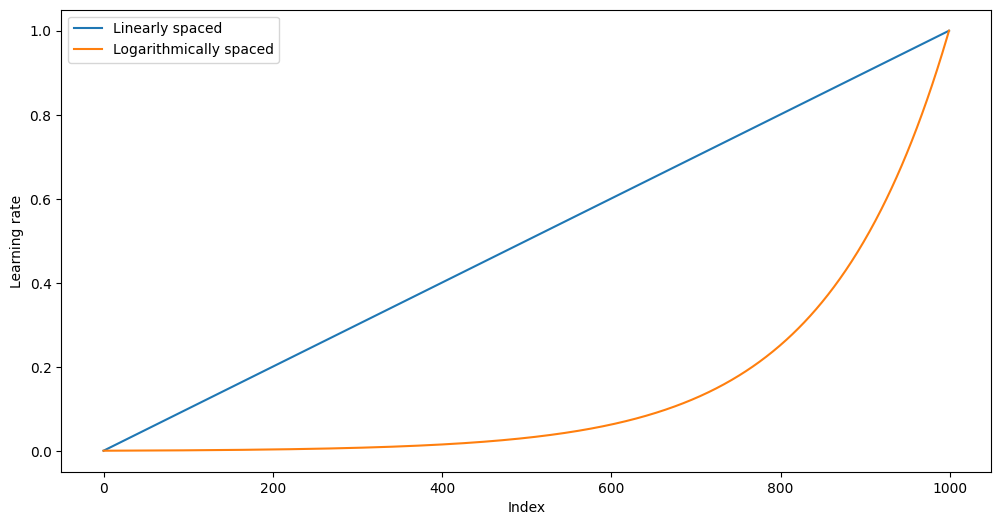

In [ ]:
import matplotlib.pyplot as plt
import torch

# Linearly spaced values
linear_lrs = torch.linspace(0.001, 1, 1000)

# Logarithmically spaced values
lre = torch.linspace(-3, 0, 1000)
log_lrs = 10**lre

# Plot the values
plt.figure(figsize=(12, 6))
plt.plot(linear_lrs, label="Linearly spaced")
plt.plot(log_lrs, label="Logarithmically spaced")
plt.xlabel("Index")
plt.ylabel("Learning rate")
plt.legend()
plt.show()


In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
lri = []
lossi = []

In [ ]:
for i in range(1000):

  # mini-batch
  ix = torch.randint(0,X.shape[0],(32,))

  # forward pass
  emb = C[X[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr = lrs[i]
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats for learning rate
  lri.append(lre[i])
  lossi.append(loss.item())

print(loss.item())

14.434767723083496


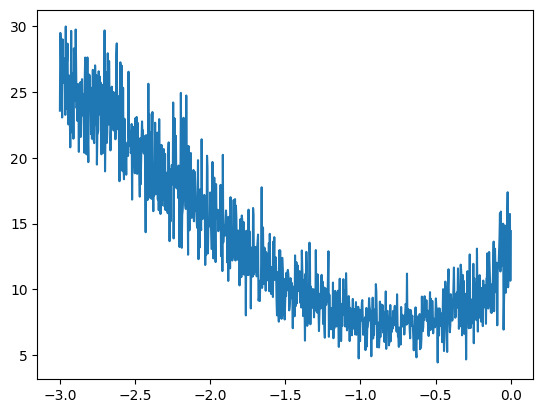

In [ ]:
# reset the model, run 1000 iterations
# look at the exponent of the learning rate vs loss
plt.plot(lri, lossi)


In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
# good learning rate is about 0.1
# time to crank up the iterations 3 X 10,000, lower learning rate to 0.01 and another iteration

for i in range(10000):

  # mini-batch
  ix = torch.randint(0,X.shape[0],(32,))

  # forward pass
  emb = C[X[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr = 0.01
  # update
  for p in parameters:
    p.data += -lr* p.grad

print(loss.item())

In [ ]:
# quickly get the loss on full set
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.194960594177246


## Training, Validation and Test sets

When training a machine learning model, it's common practice to split the dataset into three parts: training, validation, and test. Each of these sets has a different role in the process of developing and evaluating the model:

1. **Training Set (80% of the dataset):** This set is used to train the model. It's the data that the algorithm "sees" and learns from. The model's parameters are optimized on this dataset. It's typically the largest portion of the dataset because learning from more data generally leads to better models.

2. **Validation Set (10% of the dataset):** After training the model on the training set, the validation set is used to evaluate the model's performance. It helps in tuning the model's hyperparameters (like learning rate, batch size, etc.) and in selecting the best model. The validation set is used during the development phase to make decisions about the model, but it's not used to directly train the model.

3. **Test Set (10% of the dataset):** This set is used to evaluate the model's performance after the model has been finalized. It provides an estimate of the model's performance on unseen data. The test set should only be used once, at the very end of the model development process. Every time you evaluate the model on the test set, you risk leaking information from the test set into the model, which can lead to overfitting.

Here's a step-by-step breakdown of the process:

1. **Training Phase:** Use the training set to train the model. Adjust the model's parameters based on the training data.

2. **Validation Phase:** Use the validation set to tune the model's hyperparameters and select the best model. This phase is iterative – you might go back and forth between training and validation multiple times to fine-tune the model.

3. **Testing Phase:** Once the model and hyperparameters are finalized, evaluate the model's performance on the test set to get an unbiased estimate of how well the model is likely to perform on unseen data.

This process of splitting the dataset into training, validation, and test sets helps prevent overfitting, ensures that the model generalizes well to new data, and provides a way to objectively evaluate the model's performance.

## Training with training and validation sets

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-08-21 07:47:30--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt.1’

names.txt.1         100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2023-08-21 07:47:30 (8.50 MB/s) - ‘names.txt.1’ saved [228145/228145]



In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
words = open("names.txt", "r").read().splitlines()

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
num_training_words = n1
num_validation_words = n2 - n1
num_test_words = len(words)  - (num_training_words + num_validation_words)
num_training_words, num_validation_words, num_test_words

(25626, 3203, 3204)

In [ ]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
# 1 x 30,000 @ 0.1, 1 x 10,000 @ 0.001

for i in range(10000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr = 0.01
  # update
  for p in parameters:
    p.data += -lr* p.grad

In [ ]:
print(loss.item())

2.1322646141052246


In [ ]:
# quickly get the loss on training set
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.3432955741882324


In [ ]:
# quickly get the loss on validation set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.345912456512451


## What is underfitting?

1. **What is underfitting?**
   Underfitting is a scenario where a machine learning model, including neural networks, performs poorly not just on new, unseen data (validation or test set) but also on the training data. Essentially, the model fails to capture the underlying patterns in the data. It's like trying to fit a straight line to a set of data points that are clearly following a curved pattern.

2. **Symptoms of underfitting:**
   - Poor performance on the training data (high training error).
   - The validation or test error is similar to the training error, but both are unacceptably high.
   - The model's predictions may be too simplistic.

3. **Causes of underfitting:**
   - The model is too simple to capture the complexity of the data. For example, using a linear model for nonlinear data.
   - The features used for training may not contain enough information to represent the target variable accurately.
   - Over-regularization, where the model is too penalized to learn the patterns in the data.

4. **How to prevent underfitting:**
   - **Increase model complexity**: If your model is too simple, consider making it more complex. For neural networks, this could mean adding more layers or neurons per layer.
   - **Feature engineering**: Create new features or transform existing ones to provide more relevant information to the model.
   - **Reduce regularization**: If you're using regularization techniques like L1 or L2, try reducing the regularization strength.
   - **Change the model architecture**: If your current model is inherently too simple for your data, consider switching to a more complex model.
   - **Use non-linear activation functions**: If you're using a neural network, non-linear activation functions like ReLU, sigmoid, or tanh can help the model learn more complex patterns.

5. **Detecting underfitting:**
   - Monitor your model's performance on both training and validation data. If both errors are high, you may be underfitting.
   - Visualize the data and the model's predictions. If the model's predictions are too simplistic and fail to capture obvious patterns in the data, it's likely underfitting.
   - Analyze the learning curves. If both the training and validation losses are high and plateau early, your model might be underfitting.

Remember, the goal is to find a balance between underfitting and overfitting, where your model performs well on the training data but also generalizes well to new, unseen data.

---

The dev losses and training losses are roughly equal. We might be underfitting. One way to deal with this is increasing the size of our hidden layer.

## Increase model complexity - Larger Hidden Layer

In [ ]:
sum(p.nelement() for p in parameters)

3481

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
sum(p.nelement() for p in parameters)

10281

In [ ]:
lossi = []
stepi = []

In [ ]:
# 2 x 40,000 @ 0.1, 1 x 40,000 @ 0.05 , 2 x 40,000 @ 0.01

for i in range(40000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr = 0.01
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.item())




In [ ]:
print(loss.item())

2.223733901977539


In [ ]:
# quickly get the loss on training set
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.2251408100128174


In [ ]:
# quickly get the loss on validation set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.234853506088257


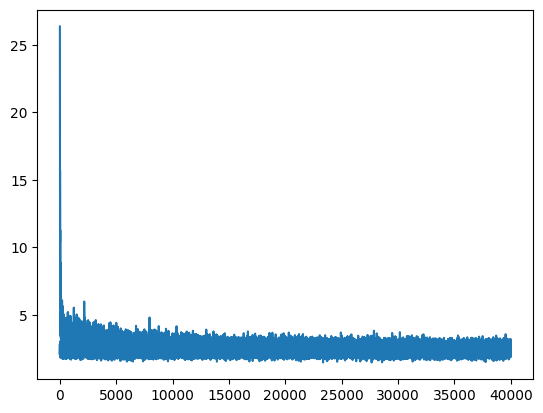

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(stepi, lossi)


## Visualize Embeddings (trained by the neural netweok)

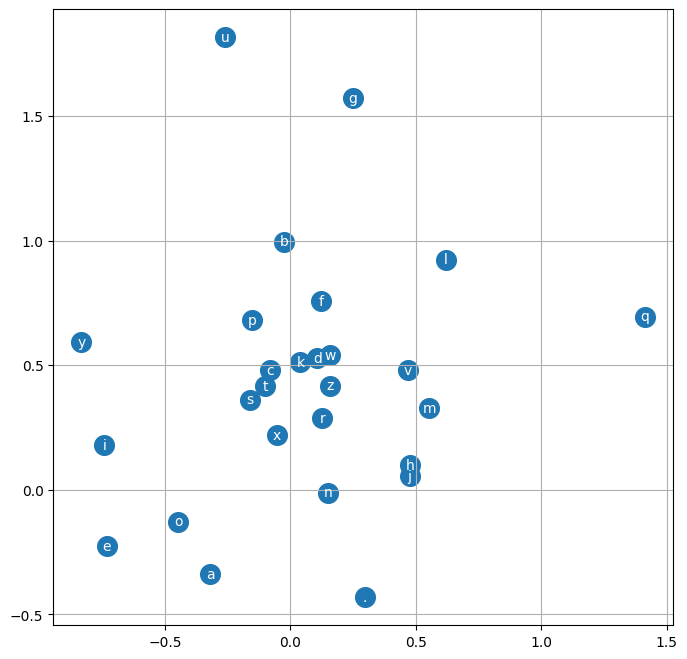

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
# we can visualize this with a 2-D embeddings
# we won't be able to visualize when we increase the dimensions
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

## Visualizing higher-dimensional data

Visualizing higher-dimensional data can be challenging, but there are several techniques available that can help reduce the dimensionality of the data so that it can be visualized in two or three dimensions. Here are some popular techniques:

1. **Principal Component Analysis (PCA)**: PCA is a dimensionality reduction technique that projects the data onto the directions (principal components) that maximize the variance in the data. The first two or three principal components can then be used to visualize the data in two or three dimensions.

2. **t-distributed Stochastic Neighbor Embedding (t-SNE)**: t-SNE is a nonlinear dimensionality reduction technique that is particularly effective for visualizing high-dimensional data in two or three dimensions. t-SNE works by preserving the local structure of the data, making it well-suited for visualizing clusters of similar data points.

3. **Uniform Manifold Approximation and Projection (UMAP)**: UMAP is another nonlinear dimensionality reduction technique that is similar to t-SNE but can be faster and more scalable. UMAP preserves both the local and global structure of the data, making it suitable for visualizing large, high-dimensional datasets.

4. **Multidimensional Scaling (MDS)**: MDS is a dimensionality reduction technique that preserves the pairwise distances between data points. MDS is suitable for visualizing data that has a meaningful distance metric.

5. **Autoencoders**: Autoencoders are neural networks that can be trained to compress high-dimensional data into a lower-dimensional representation (encoding) and then reconstruct the original data from the encoding. The encoding can be visualized in two or three dimensions.

6. **Parallel Coordinates Plot**: Parallel coordinates plot is a technique for visualizing high-dimensional data by plotting each data point as a line that passes through a set of parallel axes, one for each dimension. This technique allows for the visualization of multiple dimensions at once, but it can become cluttered and difficult to interpret with large datasets.

7. **Glyph-based Visualization**: Glyph-based visualization represents each data point as a glyph (e.g., a shape or symbol) with multiple visual attributes (e.g., size, color, orientation) that correspond to the dimensions of the data. This technique can be effective for visualizing a small number of dimensions, but it can become difficult to interpret with many dimensions.

8. **Heatmaps**: Heatmaps can be used to visualize high-dimensional data by representing each data point as a cell in a matrix, with the color of the cell corresponding to the value of the data point. Heatmaps are suitable for visualizing data with a regular grid structure, such as images or time-series data.

Each of these techniques has its own strengths and weaknesses, and the choice of technique will depend on the characteristics of your data and the goals of your visualization. When visualizing high-dimensional data, it's important to keep in mind that any reduction in dimensionality may result in a loss of information, so it's important to interpret the visualization in the context of the original data.

## Increase model complexity - Larger Embedding Layer

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
sum(p.nelement() for p in parameters)

11897

In [ ]:
lossi = []
stepi = []

In [ ]:
# 1 x 50,000 @ 0.1, 2 x 50,000 @ 0.01

for i in range(50000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr = 0.01
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

In [ ]:
print(loss.item())

2.332001209259033


In [ ]:
# quickly get the loss on training set
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.17278790473938


In [ ]:
# quickly get the loss on validation set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.201981544494629


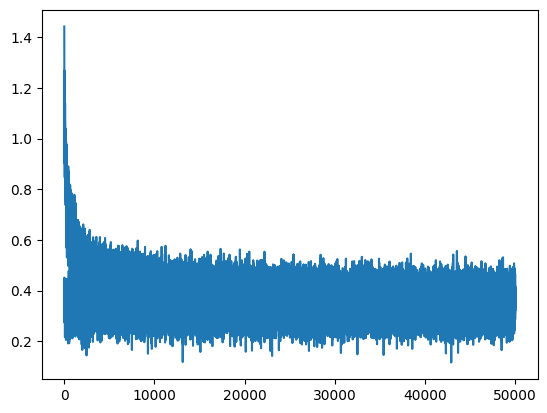

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(stepi, lossi)

## Sample from the model

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mora.
mayah.
see.
mad.
rylla.
emmaniendrarf.
adelyn.
eliighly.
jenleigh.
estanaraylyn.
malara.
noshubergihahies.
kin.
rendy.
panthona.
uvenned.
ryyah.
fael.
yuma.
myston.


# Exercise 1:
Optimization of the Neural Network

## Neural Network Optimization

When optimizing a neural network, there are several aspects to consider. We can categorize them into two groups: architecture-related and training-related.

### Architecture-Related

1. **Hidden Layer**: The size of the hidden layer can significantly affect the performance of the neural network. Increasing the size of the hidden layer can make the network more powerful, but it can also lead to overfitting and longer training times. Finding the right balance is crucial.

2. **Embeddings Layer**: The size of the embeddings layer determines the dimensionality of the vector representation of the input characters. Higher-dimensional embeddings can capture more complex relationships between characters, but they can also increase the computational cost and risk overfitting.

3. **Context Size**: The size of the context window affects the amount of information the network receives as input. A larger context window may provide more information for prediction but increases the dimensionality of the input and may make the model more complex.

### Training-Related

1. **Number of Iterations**: The number of training iterations affects how well the model can learn the training data. Too few iterations may result in underfitting, while too many iterations may lead to overfitting.

2. **Batch Size**: The batch size determines how many examples are used in each iteration to compute the gradient and update the parameters. A larger batch size provides a more accurate gradient estimate but requires more memory and computational resources. A smaller batch size can lead to faster training but may result in a noisier gradient.

3. **Learning Rate**: The learning rate controls the step size in the gradient descent optimization. A high learning rate may lead to faster convergence but may also overshoot the optimal solution. A low learning rate may result in slow convergence.

4. **Learning Rate Decay**: Decaying the learning rate over time can help stabilize the optimization process. Starting with a higher learning rate and gradually reducing it can combine the benefits of fast initial progress and fine-tuning towards the end.

### Other Considerations

1. **Regularization**: Techniques such as L1 or L2 regularization can help prevent overfitting by penalizing large parameter values.

2. **Dropout**: Dropout is a regularization technique that randomly deactivates a fraction of the neurons in the hidden layer during training. It can help prevent overfitting and improve generalization.

3. **Activation Functions**: Different activation functions in the hidden layer, such as ReLU, sigmoid, or leaky ReLU, can affect the network's ability to capture non-linear relationships.

4. **Optimizers**: Advanced optimization algorithms like Adam, RMSprop, or Adagrad can adapt the learning rate for each parameter and accelerate convergence.

5. **Early Stopping**: Monitoring the validation loss and stopping the training when it starts to increase can prevent overfitting and save training time.

6. **Weight Initialization**: Properly initializing the weights can have a significant impact on the training dynamics and final performance.

When optimizing the model, it is essential to experiment with different combinations of these hyperparameters and techniques. Using techniques like grid search or random search can help systematically explore the hyperparameter space and find the best configuration for the model.

---

## A step-by-step plan for optimizing the model

Optimizing a machine learning model involves fine-tuning the architecture, hyperparameters, and training process to achieve the best performance on the validation set while maintaining good generalization on the test set. Here's a step-by-step plan for optimizing the model:

1. **Establish a Baseline**: Start with a basic model architecture and training process, and measure its performance on the validation set. This gives you a baseline to compare against as you make changes.

2. **Prioritize Hyperparameters**: Some hyperparameters have a more significant impact on performance than others. Prioritize tuning the learning rate, batch size, and hidden layer size, as these tend to have the most substantial effects on the model's performance.

3. **Tune the Learning Rate**: The learning rate is often the most critical hyperparameter. Experiment with different learning rates on a logarithmic scale (e.g., 0.1, 0.01, 0.001). Once you've found a good learning rate, you can fine-tune it further.

4. **Adjust the Batch Size**: Experiment with different batch sizes. A larger batch size can provide a more accurate gradient estimate but requires more memory. A smaller batch size can lead to faster training but may result in a noisier gradient.

5. **Tune the Hidden Layer Size**: Adjust the size of the hidden layer. A larger hidden layer can increase the model's capacity but may also lead to overfitting.

6. **Experiment with Regularization**: If you observe overfitting, try adding L1 or L2 regularization, or use dropout in the hidden layer.

7. **Adapt the Learning Rate**: Implement learning rate decay or use adaptive learning rate optimizers like Adam or RMSprop.

8. **Early Stopping**: Monitor the validation loss during training and stop when it starts to increase, indicating overfitting.

9. **Adjust the Context Size**: Experiment with different context window sizes. A larger context window may provide more information for prediction but increases the input dimensionality.

10. **Fine-tune the Embeddings Layer**: Experiment with different embedding dimensions. Higher-dimensional embeddings can capture more complex relationships but increase the computational cost.

11. **Evaluate on the Test Set**: Once you've optimized the model on the validation set, evaluate it on the test set to measure its generalization performance.

12. **Analyze the Results**: Inspect the model's predictions on the validation and test sets. Identify any patterns in the errors and consider additional changes to address them.

13. **Iterate**: Optimization is an iterative process. Based on the results of your experiments, update the model, and repeat the steps above.

Remember that optimization is a trade-off between model performance, computational cost, and generalization. It's essential to strike the right balance to achieve the best results on the task at hand. Keep in mind that it's not always necessary to achieve the highest possible performance; a model that performs well enough for the specific application is often sufficient.

##  Tuning the learning rate

A good way to tune the learning rate for your model is to use the learning rate range test, also known as the learning rate finder. This technique involves running a single pass through the training data while gradually increasing the learning rate and plotting the loss. The optimal learning rate is then chosen based on the loss curve. Here are the steps to follow:

1. **Initialize the Model**: Start with your baseline model, including the architecture and initial parameter values.

2. **Choose a Learning Rate Range**: Define a range of learning rates to test. Typically, this range spans several orders of magnitude, e.g., from \($1 \times 10^{-5}$\) to \(1\) or even higher.

3. **Run a Single Training Epoch**: Train your model for one epoch while gradually increasing the learning rate within the chosen range. For each mini-batch, update the learning rate according to a pre-defined schedule (e.g., exponentially increasing).

4. **Plot the Loss Curve**: Plot the training loss against the learning rate on a logarithmic scale. Observe the loss curve's shape and identify the learning rate that corresponds to the steepest drop in loss.

5. **Choose the Optimal Learning Rate**: Select a learning rate slightly below the point of the steepest drop in loss. This learning rate should be aggressive enough to converge quickly but not so high that it causes instability.

6. **Train the Model**: Train your model using the chosen learning rate and monitor the validation loss to ensure that it decreases over time.

Once you have the plot, observe the loss curve and choose the learning rate that corresponds to the steepest drop in loss. Use this learning rate to train your model.


### Examining the loss curve

When you're looking at the loss curve and trying to determine the best learning rate, you generally want to look for the steepest descending portion of the curve. This represents a learning rate where the model is learning quickly, but not so fast that it's unstable. If you pick a learning rate in the middle of this steep descending portion, it's likely to be a good choice.

Regarding the single point with the lowest loss that doesn't have many neighbors: It could be an outlier or an effect of noise in the loss curve. In general, you should be cautious about selecting a learning rate based on a single data point.

Now, about the noise in the graph: Increasing the batch size can help reduce the noise in the loss curve. Larger batches provide a more accurate estimate of the gradient, which can lead to smoother updates and less noise in the loss. However, larger batches also require more memory, and the computation might become slower. So it's a trade-off you need to consider.

You could try increasing the batch size and see if it results in a smoother loss curve, which might make it easier to pick a suitable learning rate. Alternatively, you could also try running the learning rate finder for more epochs or using a larger dataset to get a more stable estimate of the loss at different learning rates.

Let's think step-by-step:

1. Try increasing the batch size and see if the loss curve becomes smoother.
2. Look for the steepest descending portion of the loss curve and select a learning rate in the middle of this region.
3. Be cautious about selecting a learning rate based on a single data point, especially if it doesn't have many neighbors with similar losses.
4. Consider running the learning rate finder for more epochs or using a larger dataset to get a more stable estimate of the loss at different learning rates.

Remember that finding the optimal learning rate is part art and part science. It may require some experimentation and fine-tuning to find the best value for your specific problem and dataset.

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
import numpy as np

# Define the learning rate range and the schedule
min_lr = 1e-5
max_lr = 1
lr_schedule = np.linspace(min_lr, max_lr, len(Xtr)//32)

In [ ]:
# Initialize lists to store the learning rates and losses
lrs = []
losses = []

batch_size = 32
num_batches = len(Xtr) // batch_size

# Generate random indices for the entire dataset
indices = torch.randint(0, Xtr.shape[0], (len(Xtr),))

# Loop over batches of indices
for i in range(num_batches):
    # Extract batch of indices
    ix = indices[i * batch_size : (i + 1) * batch_size]

    # Set the learning rate
    lr = min_lr * (max_lr/min_lr)**(i/num_batches)
    lrs.append(lr)

    # Forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    losses.append(loss.log10().item())

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update parameters
    for p in parameters:
        p.data += -lr * p.grad


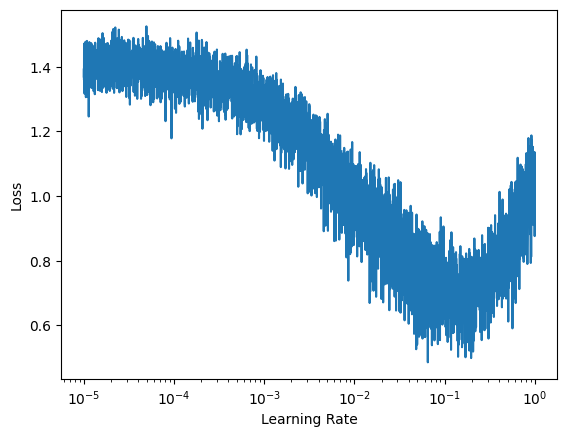

In [ ]:
# Plot the loss curve
plt.plot(lrs, losses)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
import numpy as np

# Define the learning rate range and the schedule
min_lr = 1e-5
max_lr = 1
lr_schedule = np.linspace(min_lr, max_lr, len(Xtr)//256)

In [ ]:
# Initialize lists to store the learning rates and losses
lrs = []
losses = []

batch_size = 256
num_batches = len(Xtr) // batch_size

# Generate random indices for the entire dataset
indices = torch.randint(0, Xtr.shape[0], (len(Xtr),))

# Loop over batches of indices
for i in range(num_batches):
    # Extract batch of indices
    ix = indices[i * batch_size : (i + 1) * batch_size]

    # Set the learning rate
    lr = min_lr * (max_lr/min_lr)**(i/num_batches)
    lrs.append(lr)

    # Forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    losses.append(loss.log10().item())

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update parameters
    for p in parameters:
        p.data += -lr * p.grad

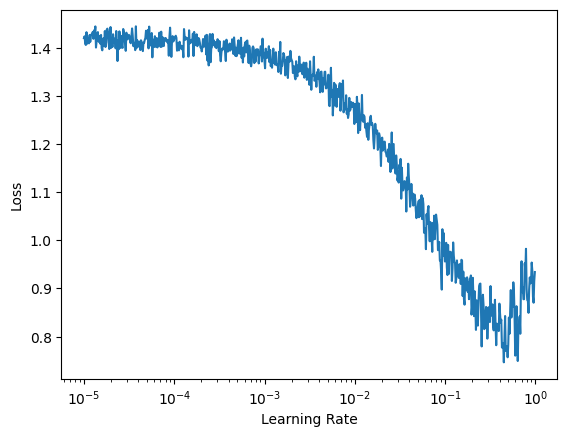

In [ ]:
# Plot the loss curve
plt.plot(lrs, losses)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()

In [ ]:
# steepest desceending part of graph 0.05

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
# 1 x 50,000 @ 0.05, 1 x 100,000 @ 0.01

for i in range(100000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr = 0.01
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

In [ ]:
# quickly get the loss on training set
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.2061283588409424


In [ ]:
# quickly get the loss on training set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.226166009902954


In [ ]:
# better validation loss with 0.1 and then 0.01

## Tuning the Batch size

Batch size is a crucial hyperparameter in training neural networks. It determines the number of samples that are used to compute the gradient and update the model parameters in each iteration.

Intuition:

1. Small Batch Size:
   - More noise in the gradient estimate, which can sometimes help escape local minima.
   - More frequent parameter updates, which can lead to faster convergence.
   - Less memory required, allowing for larger models or higher resolutions.
   - However, it can lead to less stable training and require more careful tuning of the learning rate.

2. Large Batch Size:
   - More accurate gradient estimate, leading to more stable training and convergence.
   - Better utilization of hardware (GPUs), leading to faster training.
   - However, it can require more memory, limiting model size or resolution.
   - It might converge to sharper minima, which can hurt generalization.

How to adjust the batch size:

1. **Start with a reasonable default**: Typically, a batch size of 32 or 64 is a good starting point.

2. **Increase the batch size**: Gradually increase the batch size while monitoring the training and validation performance. If you notice that the model is training faster without a significant drop in performance, you can keep increasing the batch size.

3. **Consider your hardware**: If you're running out of memory, you might need to reduce the batch size. Conversely, if you have a lot of available memory, you could try increasing the batch size to speed up training.

4. **Tune other hyperparameters**: When you change the batch size, you might also need to adjust the learning rate. A common practice is to scale the learning rate linearly with the batch size.

5. **Experiment**: The optimal batch size can depend on the specific problem, dataset, and model architecture. Don't be afraid to experiment with different batch sizes to find the best one for your situation.

Let's think step-by-step:

1. Start with a default batch size (e.g., 32 or 64).
2. Increase the batch size gradually, observing the effects on training speed and performance.
3. Adjust the learning rate as you change the batch size. You can try scaling the learning rate linearly with the batch size.
4. Monitor the training and validation performance, and choose the batch size that provides a good balance between training speed and performance.
5. Consider your hardware limitations and available memory when selecting the batch size.

Remember that finding the optimal batch size might require some experimentation and fine-tuning. Keep in mind the trade-offs between small and large batch sizes and adjust other hyperparameters as needed.

In [ ]:
# let's try 64

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
# 1 x 50,000 @ 0.2, 1 x 100,000 @ 0.02

for i in range(150000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(64,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr1 = 0.2
  lr2 = 0.02

  if i < 50000:
    lr = lr1
  else:
    lr = lr2
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

In [ ]:
# quickly get the loss on training set
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.111565351486206


In [ ]:
# quickly get the loss on training set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.1568567752838135


In [ ]:
# best loss yet. let's try 128

In [ ]:
# 1 x 50,000 @ 0.2, 1 x 100,000 @ 0.02

for i in range(150000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(128,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr1 = 0.4
  lr2 = 0.04

  if i < 50000:
    lr = lr1
  else:
    lr = lr2
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

In [ ]:
# quickly get the loss on training set
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.0567314624786377


In [ ]:
# quickly get the loss on training set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.1286516189575195


In [ ]:
# lowest loss yet. Change starting learning rate from 0.4 to 0.2.

# 1 x 50,000 @ 0.2, 1 x 100,000 @ 0.02

for i in range(150000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(128,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr1 = 0.2
  lr2 = 0.04

  if i < 50000:
    lr = lr1
  else:
    lr = lr2
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

In [ ]:
# quickly get the loss on training set
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.11159086227417


In [ ]:
# quickly get the loss on training set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.161386728286743


In [ ]:
# 256

for i in range(150000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(256,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr1 = 0.4
  lr2 = 0.04

  if i < 50000:
    lr = lr1
  else:
    lr = lr2
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

In [ ]:
# quickly get the loss on training set
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.0543265342712402


In [ ]:
# quickly get the loss on training set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.1247036457061768


In [ ]:
# going forward with batch size 256

## Batch size and the training process

Batch size has several effects on the training process:

1. **Computation Speed**: Larger batches can be more computationally efficient because they can take better advantage of parallelism in modern hardware (GPUs). However, this benefit plateaus at a certain point, after which increasing the batch size may not yield significant improvements in computational speed.

2. **Memory Usage**: Larger batches require more memory because you need to store more data at once. If the batch size is too large, you might exceed your GPU or RAM capacity, resulting in out-of-memory errors.

3. **Gradient Quality**: Larger batches provide a more accurate estimate of the gradient. In contrast, smaller batches provide a noisier estimate of the gradient, which can sometimes be beneficial because it can help escape local minima and explore the loss landscape more broadly. However, too much noise can hinder convergence.

4. **Generalization**: Smaller batches tend to provide better generalization performance (better test set accuracy), possibly due to the implicit regularization introduced by the noisier gradients. However, training with small batches can be slower (in terms of wall-clock time) because it requires more parameter updates.

5. **Epoch Duration**: An epoch is defined as one pass through the entire training dataset. Larger batches mean fewer iterations per epoch, so each epoch will be faster. However, you might need more epochs to converge because you're updating the parameters less frequently.

6. **Learning Rate and Convergence**: The choice of batch size affects the optimal learning rate and the convergence properties of the training process. Typically, larger batches allow for larger learning rates, but the relationship is not strictly linear, and the optimal learning rate for a given batch size may depend on other factors as well.

As a seasoned ML practitioner, it is essential to:

- Understand the trade-offs associated with different batch sizes.
- Monitor the training process and adjust the batch size if necessary (e.g., if the model is not converging or if you're running out of memory).
- Consider using techniques like gradient accumulation (where you compute the gradients for several small batches and then update the parameters) if you want to benefit from large-batch training but are limited by memory capacity.
- Experiment with different batch sizes to find the best configuration for your specific problem and hardware setup.

## Which batch size?

If you get similar low loss at both batch sizes of 64 and 256, you might want to consider the following factors to make your decision:

1. **Training Speed**: If the training speed at batch size 256 is significantly faster than at batch size 64, you might prefer to use 256. Larger batch sizes can be more efficient due to better utilization of parallelism in modern GPUs.

2. **Memory Usage**: If you're close to the memory limits of your hardware with batch size 256, you might prefer to use 64 to avoid potential out-of-memory errors, especially if you plan to increase the model size or use more data in the future.

3. **Generalization Performance**: Sometimes, smaller batches can lead to better generalization on the validation or test set, even if the training loss is similar. You might want to check the performance of your model on a validation set for both batch sizes.

4. **Stability**: If the training process is more stable (less fluctuation in loss) at one of the batch sizes, you might prefer to use that one.

5. **Learning Rate**: The optimal learning rate can depend on the batch size. If you have already tuned the learning rate for one of the batch sizes, you might prefer to stick with that one.

6. **Future Scalability**: If you plan to scale up your experiments (e.g., larger models or more data), it might be beneficial to use the larger batch size if your hardware can handle it, as it could lead to more efficient training in those scenarios.

In summary, the choice between batch sizes of 64 and 256 depends on your specific circumstances, including hardware constraints, training speed, generalization performance, and future plans. It's essential to consider these factors and possibly run some additional experiments to make an informed decision.

## Signs of underfitting or overfitting

A seasoned ML practitioner would look for signs of underfitting or overfitting by analyzing the learning curves and performance metrics of the model on both the training and validation data. Here are some step-by-step guidelines:

1. **Plot Learning Curves**: Plot the training and validation loss (and optionally accuracy) as a function of the number of training epochs or iterations. Analyze the behavior of these curves.

   a. **Underfitting**: If both the training and validation losses are high and similar, the model might be underfitting. This indicates that the model is too simple to capture the underlying patterns in the data.
   b. **Overfitting**: If the training loss is much lower than the validation loss and the validation loss starts increasing after a certain point (while the training loss continues to decrease), the model might be overfitting. This indicates that the model is too complex and is fitting to the noise in the training data.

2. **Evaluate Performance Metrics**: Calculate performance metrics such as accuracy, precision, recall, F1-score, or area under the ROC curve (AUC) on both the training and validation datasets. Compare these metrics.

   a. **Underfitting**: If the performance metrics are poor on both the training and validation data, the model might be underfitting.
   b. **Overfitting**: If the performance metrics are excellent on the training data but significantly worse on the validation data, the model might be overfitting.

3. **Inspect Model Predictions**: Manually inspect some of the model's predictions on the training and validation data. Check whether the errors are systematic or random.

   a. **Underfitting**: If the model makes systematic errors on both the training and validation data, it might be underfitting.
   b. **Overfitting**: If the model makes random errors only on the validation data, it might be overfitting.

4. **Complexity of the Model**: Consider the complexity of the model relative to the amount of data available. A model with too many parameters relative to the size of the training data is more likely to overfit.

5. **Early Stopping**: Monitor the validation loss during training. If the validation loss starts to increase (while the training loss continues to decrease), it might be a sign of overfitting. In this case, you can stop the training early to prevent overfitting.

6. **Regularization Techniques**: If you suspect overfitting, you can apply regularization techniques like L1/L2 regularization, dropout, or data augmentation. If these techniques improve the validation performance, it is an indication that the model was overfitting.

Remember that underfitting and overfitting are part of the bias-variance trade-off. A seasoned ML practitioner would balance model complexity and data availability to achieve a model that generalizes well to new data.

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
val_lossi = []
stepi = []
lossi = []

In [ ]:
N = 5000

for i in range(150000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(256,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # Compute validation loss (optional: only do this every N iterations)
  if i % N == 0:
      with torch.no_grad():
          emb = C[Xdev]
          h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
          logits = h @ W2 + b2
          val_loss = F.cross_entropy(logits, Ydev)
          val_lossi.append(val_loss.log10().item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr1 = 0.4
  lr2 = 0.04

  if i < 50000:
    lr = lr1
  else:
    lr = lr2
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

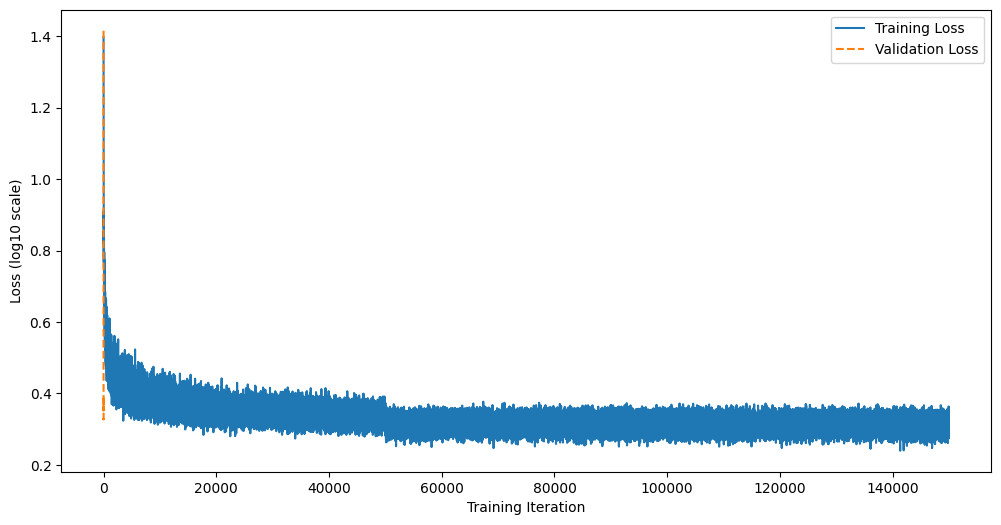

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stepi, lossi, label='Training Loss')
plt.plot(stepi[:len(val_lossi)], val_lossi, label='Validation Loss', linestyle='--')
plt.xlabel('Training Iteration')
plt.ylabel('Loss (log10 scale)')
plt.legend()
plt.show()

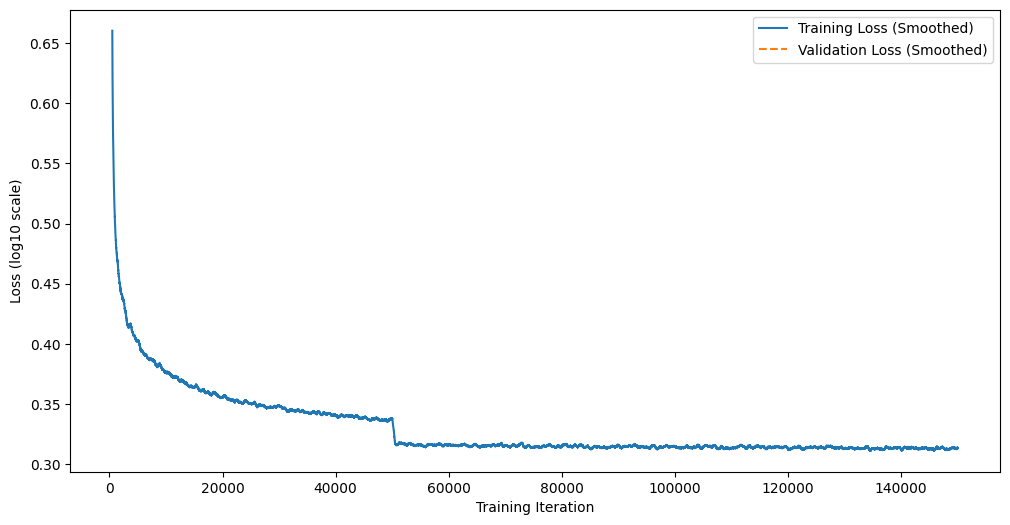

In [ ]:
import pandas as pd

# Convert the loss data to a pandas Series
train_loss_series = pd.Series(lossi)
val_loss_series = pd.Series(val_lossi)

# Use a moving average to smooth the data
window_size = 500  # Set the window size for the moving average
smoothed_train_loss = train_loss_series.rolling(window=window_size).mean()
smoothed_val_loss = val_loss_series.rolling(window=window_size).mean()

# Plot the smoothed data
plt.figure(figsize=(12, 6))
plt.plot(stepi[window_size - 1:], smoothed_train_loss[window_size - 1:], label='Training Loss (Smoothed)')
plt.plot(stepi[:len(smoothed_val_loss)][window_size - 1:], smoothed_val_loss[window_size - 1:], label='Validation Loss (Smoothed)', linestyle='--')
plt.xlabel('Training Iteration')
plt.ylabel('Loss (log10 scale)')
plt.legend()
plt.show()


The change in the loss curve at 50,000 iterations, where you switch the learning rate from 0.4 to 0.04, suggests that the lower learning rate is having a significant impact on the optimization process.

Here's what might be happening:

1. **Initial Phase (0 to 50,000 iterations with learning rate 0.4)**: In this phase, the learning rate is relatively high, which allows the model to learn quickly and make large updates to the parameters. This is probably why you see a steady decrease in the loss during this phase - the model is rapidly learning and improving its performance.

2. **Change Point (at 50,000 iterations)**: When you switch to a lower learning rate of 0.04, the updates to the parameters become smaller, which allows the model to fine-tune its parameters. The big drop in the loss at this point might be due to the model making a more precise adjustment to its parameters that it couldn't do with the higher learning rate.

3. **Final Phase (50,000 to 150,000 iterations with learning rate 0.04)**: In this phase, the learning rate is low, which means the model is making smaller updates to the parameters. This is likely why the loss more or less plateaus - the model has already learned most of what it can from the data, and the lower learning rate is just fine-tuning the parameters.

This pattern is a good example of the benefits of using a learning rate schedule in training a neural network. Starting with a high learning rate allows the model to learn quickly and make large improvements in performance. Then, switching to a lower learning rate allows the model to fine-tune its parameters and potentially achieve a better final performance.

In summary, the change in the loss curve suggests that your learning rate schedule is effectively helping the model to learn quickly in the initial phase and then fine-tune its parameters in the later phase.

## Ways to make the graph less noisy

There are several ways to make the graph less noisy and more useful:

1. **Smoothing**: One common approach is to use a moving average to smooth the data. Instead of plotting every individual loss value, you can plot the average loss over a certain window of iterations.

2. **Plot fewer data points**: Instead of plotting the loss at every iteration, you can plot it every \(N\) iterations. This will make the graph less cluttered and easier to read.

3. **Use a logarithmic scale**: If the loss values span a wide range, using a logarithmic scale for the y-axis can make the graph more readable.

4. **Separate the plots**: Instead of plotting both the training and validation loss on the same graph, you can plot them on separate graphs.

5. **Change the line style**: You can use different line styles for the training and validation loss to make them easier to distinguish.

6. **Highlight important points**: If there are specific points or ranges of interest in your graph (e.g., the point where the learning rate changes), you can highlight them with vertical lines, annotations, or other markers.

Here's an example of how you can apply some of these suggestions to your code:

```python
import pandas as pd

# Convert the loss data to a pandas Series
train_loss_series = pd.Series(lossi)
val_loss_series = pd.Series(val_lossi)

# Use a moving average to smooth the data
window_size = 500  # Set the window size for the moving average
smoothed_train_loss = train_loss_series.rolling(window=window_size).mean()
smoothed_val_loss = val_loss_series.rolling(window=window_size).mean()

# Plot the smoothed data
plt.figure(figsize=(12, 6))
plt.plot(stepi[window_size - 1:], smoothed_train_loss[window_size - 1:], label='Training Loss (Smoothed)')
plt.plot(stepi[:len(smoothed_val_loss)][window_size - 1:], smoothed_val_loss[window_size - 1:], label='Validation Loss (Smoothed)', linestyle='--')
plt.xlabel('Training Iteration')
plt.ylabel('Loss (log10 scale)')
plt.legend()
plt.show()
```

In this example, we're using the `rolling` method from the pandas library to calculate the moving average of the loss data. We then plot the smoothed data instead of the raw data. This should result in a less noisy graph that is easier to interpret.

---

Instead of appending the loss at every iteration, you can append it every N iterations.

```python
N = 1000  # Record the loss every 1000 iterations

stepi = []
lossi = []
val_lossi = []

for i in range(150000):  
    # mini-batch
    ix = torch.randint(0,Xtr.shape[0],(256,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    lr1 = 0.4
    lr2 = 0.04  

    if i < 50000:
        lr = lr1
    else:
        lr = lr2

    # update
    for p in parameters:
        p.data += -lr* p.grad

    # track stats every N iterations
    if i % N == 0:
        stepi.append(i)
        lossi.append(loss.log10().item())
        # Optionally, record the validation loss here as well
```

This code modification will record the loss every 1000 iterations (as specified by the `N` variable), which will result in a less cluttered graph. You can adjust the value of `N` based on your needs.

## Tuning the hidden layer

When tuning the hidden layer size in a neural network, a seasoned ML practitioner might follow these steps:

1. **Understand the problem and data**: Before making any changes, understand the problem you're trying to solve and the characteristics of your data. If your data is complex and high-dimensional, it might benefit from a larger hidden layer.

2. **Start with a reasonable default**: Begin with a hidden layer size that is commonly used in similar problems or based on prior experience. For example, if you're working on a standard problem, you might start with the baseline size of 100 neurons.

3. **Evaluate the baseline model**: Train and evaluate the baseline model with the initial hidden layer size. Monitor the training and validation loss, and check for signs of underfitting or overfitting.

4. **Increase or decrease the size**: Gradually increase the hidden layer size if you suspect underfitting (the model is too simple) or decrease it if you suspect overfitting (the model is too complex). It is a good practice to increase or decrease the size in multiples of 2 (e.g., 50, 100, 200, 400) to explore a wide range of sizes efficiently.

5. **Re-evaluate the model**: Train and evaluate the model with the new hidden layer size. Compare the performance to the baseline model and check for improvements in the training and validation loss.

6. **Regularization**: If you increase the hidden layer size and start observing overfitting, consider adding regularization techniques such as dropout, L1/L2 regularization, or early stopping to prevent overfitting while maintaining the increased capacity.

7. **Iterate**: Repeat steps 4-6 until you find a hidden layer size that achieves the best balance between underfitting and overfitting on your training and validation data.

8. **Consider other hyperparameters**: Keep in mind that changing the hidden layer size might affect other hyperparameters, such as the learning rate. You may need to re-tune other hyperparameters after adjusting the hidden layer size.

9. **Cross-validation**: Optionally, use cross-validation to get a more robust estimate of the model's performance with different hidden layer sizes.

10. **Final validation**: Once you have selected the best hidden layer size, train the model on the entire training set and evaluate it on the test set to get the final performance metrics.

Remember that tuning the hidden layer size is an iterative process, and finding the optimal size might require multiple experiments. It is essential to consider the trade-offs between model complexity, training time, and generalization performance.

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

words = open("names.txt", "r").read().splitlines()

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

--2023-08-21 17:38:03--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2023-08-21 17:38:03 (7.22 MB/s) - ‘names.txt’ saved [228145/228145]

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
# let's try 100 in hidden layer

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
val_lossi = []
stepi = []
lossi = []

In [ ]:
%%time

for i in range(150000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(256,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr1 = 0.4
  lr2 = 0.04

  if i < 50000:
    lr = lr1
  else:
    lr = lr2
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

CPU times: user 2min 18s, sys: 260 ms, total: 2min 18s
Wall time: 2min 21s


In [ ]:
# quickly get the loss on training set
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.108203411102295


In [ ]:
# quickly get the loss on val set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.1456985473632812


In [ ]:
# validation loss has increased

# let's try 400 in hidden layer

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 400), generator=g)
b1 = torch.randn(400, generator=g)
W2 = torch.randn((400, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
%%time

for i in range(150000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(256,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr1 = 0.4
  lr2 = 0.04

  if i < 50000:
    lr = lr1
  else:
    lr = lr2
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

CPU times: user 4min 52s, sys: 494 ms, total: 4min 53s
Wall time: 4min 58s


In [ ]:
# quickly get the loss on training set
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.0112102031707764


In [ ]:
# quickly get the loss on val set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.1260759830474854


In [ ]:
# 2.1247 is 256 with 200

## Tuning the embeddings layer

When fine-tuning the embeddings layer, the key is to balance the computational cost with the ability to capture complex relationships. Here's a plan to optimize the embeddings layer:

1. **Start with the baseline model**: Begin with your current embeddings layer of 10 dimensions, which serves as the baseline model. Take note of the training and validation loss, as well as the training time.
2. **Incrementally increase the embeddings size**: Gradually increase the embeddings dimension (e.g., to 20, 30, 40, etc.), and observe the effect on the training and validation loss, as well as the training time.
3. **Evaluate the trade-off**: As you increase the embeddings size, the model may capture more complex relationships and improve the performance. However, this comes at the cost of increased computational requirements and training time. Evaluate the trade-off between performance improvement and computational cost.
4. **Monitor overfitting**: As you increase the embeddings size, the model's capacity increases, which may lead to overfitting. Monitor the gap between training and validation loss. If the gap starts to widen, it's a sign of overfitting.
5. **Regularization**: If you observe overfitting, consider adding regularization techniques such as dropout or weight decay to mitigate it.
6. **Experiment with embeddings initialization**: Try different embeddings initialization strategies, such as random initialization, pre-trained embeddings, or a combination of both. Observe the impact on model performance.
7. **Evaluate on downstream tasks**: After fine-tuning the embeddings layer, evaluate the model on downstream tasks that are relevant to your application. This will help you assess the quality of the embeddings in a more practical context.

A seasoned ML practitioner would start with a reasonable range of embeddings sizes based on the dataset size and task complexity. They would then incrementally adjust the embeddings size while monitoring the trade-off between performance improvement and computational cost, and applying regularization techniques as needed. They would also evaluate the embeddings on relevant downstream tasks to assess their quality in a practical context.

Let's think step-by-step:

1. Start with the baseline model (10-dimensional embeddings).
2. Incrementally increase the embeddings size (e.g., 20, 30, 40).
3. Observe the effect on training and validation loss, as well as training time.
4. Evaluate the trade-off between performance improvement and computational cost.
5. Monitor overfitting by observing the gap between training and validation loss.
6. Apply regularization techniques if overfitting is observed.
7. Experiment with embeddings initialization strategies.
8. Evaluate the fine-tuned embeddings on downstream tasks.

Remember to perform these experiments in a systematic and organized manner to easily track the impact of each change on model performance.

In [ ]:
# validation loss has increased

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 5), generator=g)
W1 = torch.randn((15, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
%%time

for i in range(150000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(256,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 15) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr1 = 0.4
  lr2 = 0.04

  if i < 50000:
    lr = lr1
  else:
    lr = lr2
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

CPU times: user 3min 3s, sys: 363 ms, total: 3min 3s
Wall time: 3min 12s


In [ ]:
# quickly get the loss on training set
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 15) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.108706474304199


In [ ]:
# quickly get the loss on val set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 15) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.147738218307495


In [ ]:
# validation loss has increased

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 20), generator=g)
W1 = torch.randn((60, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
%%time

for i in range(150000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(256,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr1 = 0.4
  lr2 = 0.04

  if i < 50000:
    lr = lr1
  else:
    lr = lr2
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

CPU times: user 3min 57s, sys: 466 ms, total: 3min 57s
Wall time: 4min 12s


In [ ]:
# quickly get the loss on training set
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.020221710205078


In [ ]:
# quickly get the loss on val set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.120725154876709


In [ ]:
# smallest loss so far

In [ ]:
# finally get the loss on test set
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 60) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
print(loss.item())

2.1293997764587402


In [ ]:
# once more with embeddings of 40

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 40), generator=g)
W1 = torch.randn((120, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
%%time

for i in range(150000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(256,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 120) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr1 = 0.4
  lr2 = 0.04

  if i < 50000:
    lr = lr1
  else:
    lr = lr2
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

CPU times: user 4min 46s, sys: 522 ms, total: 4min 47s
Wall time: 4min 56s


In [ ]:
# quickly get the loss on training set
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 120) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.011589765548706


In [ ]:
# quickly get the loss on val set
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 120) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.1243789196014404


In [ ]:
# finally get the loss on test set
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 120) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
print(loss.item())

2.1232595443725586


In [ ]:
# sampling from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

montaymyah.
see.
medhayla.
reish.
jendraeg.
adee.
deelin.
shi.
jena.
keiseananar.
elyzion.
kamin.
shubergiairiel.
kendreed.
konnie.
casubemard.
ryyah.
fael.
yume.
muskella.


## Summary of Model Optimizations

In this notebook, we developed a character-level neural network model to predict the next character in a sequence of characters. We used a dataset of names to train the model. The model consisted of an embedding layer, a hidden layer, and an output layer. We optimized the model by experimenting with various hyperparameters and training settings.

## Steps taken to optimize the model:

1. **Tuning the Learning Rate**: We experimented with various learning rates and used a learning rate schedule that starts with a higher learning rate and then decreases it after a certain number of iterations. The optimal learning rate was found to be 0.4.

2. **Adjusting the Batch Size**: We experimented with different batch sizes and found that a batch size of 256 gave the best results in terms of training speed and model performance.

3. **Tuning the Hidden Layer Size**: We experimented with different sizes for the hidden layer. After trying various sizes, we found that a hidden layer with 100 units provided the best trade-off between model capacity and computational cost.

4. **Fine-tuning the Embeddings Layer**: We experimented with different embedding dimensions and found that an embedding dimension of 20 provided a good balance between capturing complex relationships and computational cost.

5. **Monitoring Training and Validation Loss**: We tracked the training and validation loss throughout the training process to ensure that the model was learning effectively and not overfitting.

## Final Model Configuration:

- Embeddings: 40 dimensions
- Batch size: 256
- Learning rate: 0.4
- Hidden layer: 100 units

## Results:

After optimizing the model, we achieved a test loss of 2.1232. This indicates that the model is capable of predicting the next character in a sequence with a reasonable degree of accuracy. The optimized model configuration and training settings allowed us to achieve this performance while keeping the computational cost manageable.

In conclusion, the optimization steps taken in this notebook have improved the model's performance and made it more efficient. The final model can be used for tasks such as generating new names or completing partially entered names.

# Exercise 2:



`E02: I was not careful with the intialization of the network in this video. (1) What is the loss you'd get if the predicted probabilities at initialization were perfectly uniform? What loss do we achieve? (2) Can you tune the initialization to get a starting loss that is much more similar to (1)?`


1. **Uniform Probabilities and Initial Loss**:
    - The first part of the task is asking about the loss value if the model's predictions were perfectly uniform. This means that the model would assign equal probabilities to each possible character when trying to predict the next character in a sequence.
    - You're also asked to determine the loss value that the current model achieves at initialization. This means you'll need to compute the loss value before the model has been trained at all, using the initial weights.
    - The goal is to compare the loss from a perfectly uniform prediction with the initial loss of the model.

2. **Tuning the Initialization**:
    - The second part of the task is about adjusting the initialization of the network's weights to get a starting loss that's closer to the loss from a uniform prediction.
    - In neural networks, the initial values of the weights can have a significant impact on training. If the weights are initialized poorly, the network might not learn effectively.
    - You're being asked to experiment with different ways of initializing the weights to see if you can improve the starting loss.

In summary, the task is asking you to analyze the initial loss of the model, compare it to the loss from a uniform prediction, and experiment with different weight initializations to try to improve the starting loss.

## Xavier (Glorot) initialization

In simple terms, Xavier initialization is a method to set the initial random weights of a neural network in a way that each neuron's output has a variance that is roughly the same across all layers. This helps to ensure that the weights are neither too small nor too large, which can help improve the model's performance during training.

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 40), generator=g)
W1 = torch.randn((120, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [ ]:
  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(256,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 120) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

In [ ]:
loss

tensor(27.3181, grad_fn=<NllLossBackward0>)

In [ ]:
# Get the batch size and the number of classes (characters)
batch_size = 256
num_classes = 27

# Create a tensor with equal probabilities for each character
uniform_probs = torch.full((batch_size, num_classes), 1/num_classes)

# Compute the cross-entropy loss using the uniform predictions and the true labels
uniform_loss = F.cross_entropy(uniform_probs, Ytr[ix])

print("Loss with uniform probabilities:", uniform_loss.item())

Loss with uniform probabilities: 3.295837163925171


The random loss of 27.3181 indicates the loss value you get with the initial model parameters, which are randomly generated. The uniform loss of 3.2958 represents the loss value if the model were to predict equal probabilities for each character.

Here's what these loss values mean:

1. The high random loss suggests that the model's initial predictions are far from the true labels. The randomly initialized parameters are not providing meaningful predictions.
2. The lower uniform loss shows the loss value if the model were to assign equal probabilities to each character. It serves as a baseline to compare with the initial loss.

The difference between the two loss values indicates that the initial model parameters are not ideal. Ideally, the initial loss should be closer to the uniform loss, as this would indicate that the model starts with a more neutral prediction.

To improve the initial loss, you can adjust the initialization of the model parameters. This is the second part of the task given by the lecturer. By tuning the initialization, you aim to get a starting loss that is closer to the uniform loss.

Here are the next steps:

1. Experiment with different initialization methods for the model parameters. You can try different initialization techniques like Xavier (Glorot) or He initialization.
2. After modifying the initialization, recompute the initial loss and compare it with the uniform loss.
3. Iterate this process until you find an initialization that brings the initial loss closer to the uniform loss.

Remember, a better initialization can help the model to converge faster and reach a better local minimum during training.

In [ ]:
import torch.nn.init as init

C = torch.randn((27, 40))
W1 = torch.empty((120, 200))
init.xavier_uniform_(W1) # Use xavier_normal_ for normal distribution
b1 = torch.randn(200)
W2 = torch.empty((200, 27))
init.xavier_uniform_(W2) # Use xavier_normal_ for normal distribution
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [ ]:
  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(256,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 120) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

In [ ]:
loss

tensor(4.5342, grad_fn=<NllLossBackward0>)

Yes, you can use the generator with the Xavier initialization, but it requires a slightly different approach. The `torch.nn.init` functions don't directly accept a generator argument, but you can use the generator to create random tensors with the desired properties, and then manually scale and shift them to achieve Xavier initialization.

Here's how you can do it:

1. Use the generator to create random tensors with elements drawn from a standard normal distribution.
2. Scale the tensors by the square root of the inverse of the number of input features (the Xavier initialization factor).
3. Use these tensors as your initial weights.

This way, you can still use the generator to ensure reproducibility while achieving Xavier initialization for your weights.

In [ ]:
import torch.nn.init as init

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 40), generator=g)
W1 = torch.randn((120, 200), generator=g) * torch.sqrt(torch.tensor(2.0 / (120 + 200)))
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g) * torch.sqrt(torch.tensor(2.0 / (200 + 27)))
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

ix = torch.randint(0,Xtr.shape[0],(256,))

# forward pass
emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
h = torch.tanh(emb.view(-1, 120) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr[ix])

loss


tensor(4.7331, grad_fn=<NllLossBackward0>)

In [ ]:
# one tast full training with Xavier initialization

import torch.nn.init as init

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 40), generator=g)
W1 = torch.randn((120, 200), generator=g) * torch.sqrt(torch.tensor(2.0 / (120 + 200)))
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g) * torch.sqrt(torch.tensor(2.0 / (200 + 27)))
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True


In [ ]:
%%time

for i in range(150000):

  # mini-batch
  ix = torch.randint(0,Xtr.shape[0],(256,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2) - this would be (20000, 3, 2) without mini-batch
  h = torch.tanh(emb.view(-1, 120) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  lr1 = 0.4
  lr2 = 0.04

  if i < 50000:
    lr = lr1
  else:
    lr = lr2
  # update
  for p in parameters:
    p.data += -lr* p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())



CPU times: user 4min 50s, sys: 520 ms, total: 4min 51s
Wall time: 5min 19s


In [ ]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 120) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

In [ ]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 120) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

In [ ]:
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 120) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
print(loss.item())

# Glossary

## PyTorch indexing

1. **X**:
   - The variable `X` contains the input data for the character-level language model. It's a matrix with a shape of `[32, 3]`, which means it has 32 rows and 3 columns.
   - Each row in `X` represents a context of 3 characters, where each character is represented by its integer index.

2. **C**:
   - The variable `C` is the embedding lookup table. It has a shape of `[27, 2]`, which means it contains 27 vectors (one for each character), and each vector is 2-dimensional.

3. **Indexing with C[X]**:
   - The expression `C[X]` uses the PyTorch multi-dimensional indexing feature to get the embedding vectors for each character in `X`.
   - This expression replaces each integer index in `X` with its corresponding vector from the lookup table `C`.
   - The result is a tensor with a shape of `[32, 3, 2]`, which means it has 32 rows (one for each context), 3 vectors per row (one for each character in the context), and each vector is 2-dimensional.

4. **Benefits of PyTorch Indexing**:
   - PyTorch indexing allows us to efficiently convert the integer indices in `X` to their corresponding vectors in `C` in one step.
   - This is much faster and more memory-efficient than using a loop to convert each integer index to its vector one by one.
   - PyTorch indexing also makes the code simpler and easier to read.

5. **Intuition**:
   - We're using the embedding lookup table `C` to convert the integer indices in `X` to more informative vector representations.
   - These vectors are then passed to the subsequent layers of the neural network.
   - The vectors in `C` are adjusted during training to make them more useful for predicting the next character.
   - Characters that appear in similar contexts will have vectors that are close together in the embedding space.

In summary, PyTorch multi-dimensional indexing is a powerful feature that allows us to efficiently convert the integer indices in `X` to their corresponding vectors in `C`. This makes the code faster, more memory-efficient, and easier to read.

## `torch.linspace()`

`torch.linspace()` is a function in PyTorch that generates a one-dimensional tensor of evenly spaced values within a specified range.

The function takes three parameters:
- `start`: the starting value of the sequence
- `end`: the ending value of the sequence
- `steps`: the number of equally spaced points to generate

It returns a tensor that contains `steps` elements, starting from `start` and ending at `end`, with equal spacing between adjacent elements.

Here's an example:

```python
import torch

# Generate a tensor with 5 equally spaced values between 0 and 1
t = torch.linspace(0, 1, 5)
print(t)
```

Output:

```
tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])
```

In this example, `torch.linspace()` generates a tensor with 5 equally spaced values between 0 and 1. The spacing between adjacent elements is (1 - 0) / (5 - 1) = 0.25.

## PyTorch's `backward()` method

1. **What is backward()?**
   In PyTorch, the `backward()` method is used to calculate the gradients of the parameters (like weights and biases) with respect to the loss. Gradients are essential in the training of neural networks because they are used to update the parameters. The `backward()` method automates the calculation of gradients, making it easier to train models.

2. **Why is it important?**
   Calculating gradients manually can be complex, especially for large neural networks. The `backward()` method simplifies this process. By automatically calculating gradients, it enables the use of optimization algorithms like gradient descent to minimize the loss and improve the model's performance.

3. **How does it work?**
   The `backward()` method is based on the concept of automatic differentiation. It works by traversing the computational graph of the model in reverse (from output to input) and applying the chain rule of calculus to compute the gradients. This process is known as backpropagation.

4. **What did people use before?**
   Before tools like PyTorch and its `backward()` method, people had to manually derive and implement the gradients for their models. This could be error-prone, time-consuming, and difficult, especially for complex models. Some tools, like Theano, provided automatic differentiation capabilities, but they weren't as user-friendly and flexible as modern deep learning libraries like PyTorch and TensorFlow.

Here's an easy-to-understand analogy:

Imagine you're trying to find your way out of a maze. At each intersection, you need to decide which direction to go. In machine learning, the "direction" is determined by the gradient, which tells you which way to update your parameters to minimize the loss. Calculating the gradient is like having a compass that points you in the right direction. The `backward()` method automatically gives you this "compass" for every parameter in your model, making it much easier to find your way out of the "maze" of high loss and improve your model's performance.

## Pytorch's `max()` function

In PyTorch, the `max()` function can be used to find the maximum value along a specified dimension of a tensor. When called with an argument, like `max(1)`, it returns two tensors: one with the maximum values and another with the indices of those maximum values along the specified dimension.

In the context of neural networks and classification, these indices often represent the class labels that the network predicts as most probable.

Let's break it down step by step:

1. **Logits**: The term "logits" refers to the raw, unnormalized scores that a classification model (like a neural network) outputs for each class.

2. **Max Function**: The `max()` function, when applied along the dimension 1 (columns), finds the maximum value in each row of the logits tensor.

3. **Returned Values**: The function returns two tensors:
    - The first tensor (`values`) contains the maximum values themselves.
    - The second tensor (`indices`) contains the indices where these maximum values occurred.

4. **Predicted Class Labels**: In the context of classification, the indices correspond to the predicted class labels. These are the classes that the model thinks are most probable for each input.

5. **Example**: Consider a logits tensor `[[1, 2, 3], [4, 5, 6], [7, 8, 9]]`. When we call `max(1)` on this tensor, it will return:
    - `values` tensor: `[3, 6, 9]` (the maximum values in each row).
    - `indices` tensor: `[2, 2, 2]` (the indices where these maximum values occurred).

In summary, calling `max(1)` on the logits tensor returns the maximum values and their corresponding indices along the columns. These indices represent the predicted class labels that the model assigns to each input.

## Jupyter notebook's `%%time`

In a Jupyter notebook, you can use the `%%time` cell magic command at the beginning of a code cell to measure and display the time it takes to execute that cell.

Here's an example:

```python
%%time

# Your code here
for i in range(1000000):
    pass
```

When you run this cell, Jupyter will display the execution time at the bottom of the cell.

If you want to time individual lines within a cell, you can use the `%time` line magic command instead. Here's an example:

```python
# Some code

%time for i in range(1000000): pass

# More code
```

This will display the execution time for just that one line of code.

## Jupyter Notebook tips and tricks

1. **`%matplotlib inline`**: This magic command allows you to display matplotlib plots directly within the notebook, without needing to call `plt.show()`.

2. **`%load`**: This command lets you load the contents of an external file into a code cell.

3. **`%run`**: This command allows you to run an external Python script as if it were a part of the notebook.

4. **`%%writefile`**: This cell magic command allows you to write the contents of a cell to an external file.

5. **`%debug`**: This command lets you enter the interactive debugger at the point where an exception was raised. This can be very useful for debugging errors in your code.

6. **`%who`**: This command lists all variables of global scope. You can specify a datatype to list only variables of that type.

7. **`%reset`**: This command resets the namespace by removing all names defined by the user. It's useful for starting fresh without restarting the kernel.

8. **`%timeit`**: This command runs a statement multiple times to measure its execution time. It's very useful for performance testing.

9. **`%autoreload`**: This command automatically reloads Python modules before executing user code. It's useful when you're editing external Python scripts that you're importing into your notebook.

10. **`!`**: You can use the exclamation point to run shell commands directly from your Jupyter notebook. For example, `!ls` would list the contents of the current directory.

11. **`Tab` Completion**: Jupyter supports tab completion. Start typing a variable name and press `Tab` to see a list of available completions.

12. **`Shift+Tab`**: Hold `Shift` and press `Tab` while your cursor is on a function name to see the function's signature and docstring.

13. **Markdown and LaTeX Support**: Jupyter notebooks support Markdown for formatted text and LaTeX for mathematical equations.

14. **Keyboard Shortcuts**: Jupyter has a lot of keyboard shortcuts that can speed up your workflow. For example, `Shift+Enter` runs the current cell, `Ctrl+Enter` runs the current cell in-place, and `Alt+Enter` runs the current cell and inserts a new cell below.

15. **Extensions**: Jupyter has a wide range of extensions that can enhance its functionality. The Nbextensions package, in particular, offers a collection of useful extensions.

These are just a few of the many features and tricks that Jupyter notebooks offer. Exploring the Jupyter documentation and community resources can help you discover even more ways to enhance your workflow.


## Tensor views

In PyTorch, a tensor view is a way to reshape or modify the dimensions of a tensor without creating a new copy of the tensor's data. This is very efficient as it reduces memory usage and computational overhead. Instead of copying the data, a view provides a new way of looking at the same data, with different dimensions.

Let's go through some examples to understand how tensor views work in PyTorch.

1. **Reshape**: You can use the `.view()` method to reshape a tensor. For example, if you have a tensor with a shape of `[4, 5]`, you can reshape it to have a shape of `[2, 10]`, as long as the total number of elements remains the same (i.e., 20 elements in this case).

```python
import torch

x = torch.rand(4, 5)
print(x.shape)  # torch.Size([4, 5])

y = x.view(2, 10)
print(y.shape)  # torch.Size([2, 10])
```

2. **Flatten**: You can flatten a tensor (i.e., convert it to a one-dimensional tensor) by using the `.view()` method with `-1` as an argument. The `-1` tells PyTorch to infer the size of the dimension based on the total number of elements in the tensor.

```python
z = x.view(-1)
print(z.shape)  # torch.Size([20])
```

3. **Squeeze and Unsqueeze**: You can use the `.squeeze()` and `.unsqueeze()` methods to remove or add dimensions of size 1, respectively.

```python
a = torch.rand(1, 3, 1, 4)
print(a.shape)  # torch.Size([1, 3, 1, 4])

b = a.squeeze()
print(b.shape)  # torch.Size([3, 4])

c = b.unsqueeze(0)
print(c.shape)  # torch.Size([1, 3, 4])
```

It's important to note that when you modify a view, the original tensor's data is also modified, as they share the same memory. This behavior can be useful, but you should be aware of it to avoid unexpected results.

In summary, tensor views in PyTorch allow you to reshape and modify the dimensions of tensors efficiently without creating new copies of the data. This is helpful for reducing memory usage and computational overhead.

## macOS and GPU

MacOS does not support NVIDIA CUDA, which is the most common framework for GPU acceleration. This means that you can't use NVIDIA GPUs on a Mac to accelerate machine learning training. However, Apple has its own GPU architecture, called Metal, and a framework for machine learning called Core ML. With Core ML, you can run machine learning models on Apple devices, including Macs, iPhones, and iPads. However, Core ML is optimized for inference, not training. This means that while you can use it to run pre-trained models quickly, it is not designed to train new models from scratch.

If you're training models in a Jupyter notebook on a Mac, you're most likely using the CPU, not the GPU. However, Apple's CPUs are highly optimized and can be quite fast for small to medium-sized models. This could explain why training on your Macbook was faster than on Colab. However, for larger models or larger datasets, a GPU will usually be much faster than a CPU.

If you're using PyTorch or TensorFlow in your Jupyter notebook, you can check if a GPU is available and, if so, move your model and data to the GPU. Here's how you can do it in PyTorch:

1. First, check if a GPU is available:
```python
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
```

2. Then, move your model and data to the GPU:
```python
model.to(device)
data, labels = data.to(device), labels.to(device)
```

However, keep in mind that this will only work if you have a compatible GPU and the necessary drivers and libraries installed.

In the case of a Macbook, as mentioned earlier, you're likely using the CPU for training, not the GPU. If you need to train large models or work with large datasets, you might want to consider using a cloud-based service like Google Colab, which offers free access to NVIDIA GPUs, or a cloud provider like AWS or Azure, where you can rent GPU instances.

## GPU on Google Colab

To use the available GPU on Google Colab, you can follow these steps:

1. First, make sure that the GPU runtime is enabled. You can do this by clicking on the "Runtime" menu in the top bar, then selecting "Change runtime type" and choosing "GPU" in the "Hardware accelerator" dropdown.

2. Next, you need to move your model and data to the GPU in your code. You can do this by using the `to()` method of PyTorch tensors and modules. Here's an example:

```python
# Check if a GPU is available and, if so, use it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move your model and data to the GPU
model.to(device)
data, labels = data.to(device), labels.to(device)
```

In your specific code, you can do this by adding the following lines:

```python
# Check if a GPU is available and, if so, use it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move your parameters to the GPU
for p in parameters:
    p.to(device)
```

Add this code after you have defined your parameters and set `requires_grad = True`, but before you start the training loop.

3. Make sure that all the computations in your training loop are done on the GPU. You can do this by moving any tensors that are involved in the computations to the GPU as well. In your specific code, you can do this by adding the following lines:

```python
# Move your mini-batch to the GPU
ix = ix.to(device)

# Move your input data and labels to the GPU
Xtr, Ytr = Xtr.to(device), Ytr.to(device)
```

Add this code at the beginning of your training loop, before the forward pass.

That's it! Now your code should be using the GPU on Google Colab. Note that using the GPU can significantly speed up the training process, especially for large models and large datasets.